<h1>The Battle of the Neighborhoods (Week 2)</h1>

## Table of contents
* [Introduction/Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

 <h2>Introduction/Business Problem</h2> <a name="introduction"></a>
 

<h3>Problem Background</h3>

New York City, the most populated city in New York and the United States with a population of 17,990,455, lies at the end of the Hudson River on the southernmost tip of the state New York.It is a global hub of business and commerce. The city is a major center for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theater, fashion, and the arts in the United States.

The cost of living and the cost of opening a new buisness is always a key initial factor for any orgaisation or entrepreneur. Thus if any new business venture or expansion is taking place, it needs to be analysed very carefully. The analysis should provide the key factors that will drive the environment and health of any business.


<h3>Problem Description</h4>

A Food Joint is one among those businessess which can grow in no time provided that the area market is first analysed.A food Joint may include a restaurant,pub,cafe,parlours,etc.Considering a Businessman Mr.M wants to open an ITALIAN restaurant and he approaches a data scientist to analalyse the factors that will play a key role in the development as well as growth.Since New York is already known for its excellent cuisines and Italian food culture, the following factors are very important to be analysed:

1.The best possible location for the restarant.

2.Which neighborhoods and boroughs of New York City have the most as well as the best Italian restaurants

3.Where would one go in New York City to have the best Italian food?


<h3>Data</h3> <a name="data"></a>

The city which will be analysed thoroughly: New York City

New York City has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Links to the datasets :


<b>https://cocl.us/new_york_dataset</b>
![image.png](attachment:image.png)

<b>https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm</b>

Newyork city geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in New York City. The below is image of the Foursquare API data.


In [ ]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

In [122]:
#Foursquare Credentials!!

In [54]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [121]:
ny_data = get_new_york_data()
ny_data.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [56]:
ny_data.shape

(306, 4)

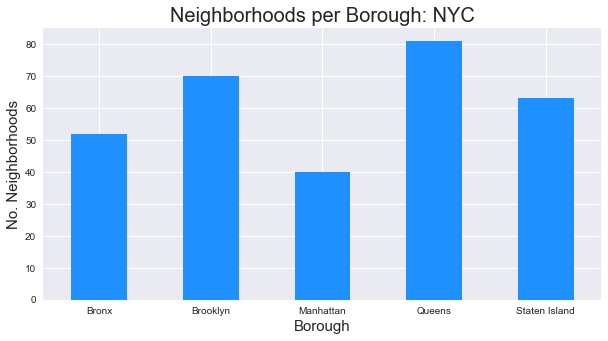

In [57]:
clr = "dodgerblue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [100]:
# queens has most neighborhoods
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(ny_data),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    print(row)
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Italian Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Italian Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Italian Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Italian Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Italian Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Italian Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Italian Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Italian Resturants in Woodlawn, Bronx:1
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Italian Resturants in Norwood, Bronx:0
['Bronx', '

( 68 / 306 ) Italian Resturants in Red Hook, Brooklyn:0
['Brooklyn', 'Red Hook', 40.676253230250886, -74.0127589747356]
( 69 / 306 ) Italian Resturants in Gowanus, Brooklyn:0
['Brooklyn', 'Gowanus', 40.673931143187154, -73.99444087145339]
( 70 / 306 ) Italian Resturants in Fort Greene, Brooklyn:3
['Brooklyn', 'Fort Greene', 40.68852726018977, -73.97290574369092]
( 71 / 306 ) Italian Resturants in Park Slope, Brooklyn:1
['Brooklyn', 'Park Slope', 40.67232052268197, -73.97705030183924]
( 72 / 306 ) Italian Resturants in Cypress Hills, Brooklyn:0
['Brooklyn', 'Cypress Hills', 40.68239101144211, -73.87661596457296]
( 73 / 306 ) Italian Resturants in East New York, Brooklyn:0
['Brooklyn', 'East New York', 40.669925700847045, -73.88069863917366]
( 74 / 306 ) Italian Resturants in Starrett City, Brooklyn:0
['Brooklyn', 'Starrett City', 40.64758905230874, -73.87936970045875]
( 75 / 306 ) Italian Resturants in Canarsie, Brooklyn:0
['Brooklyn', 'Canarsie', 40.63556432797428, -73.90209269778966]


( 132 / 306 ) Italian Resturants in Jackson Heights, Queens:0
['Queens', 'Jackson Heights', 40.75198138007367, -73.88282109164365]
( 133 / 306 ) Italian Resturants in Elmhurst, Queens:0
['Queens', 'Elmhurst', 40.744048505122024, -73.88165622288388]
( 134 / 306 ) Italian Resturants in Howard Beach, Queens:3
['Queens', 'Howard Beach', 40.65422527738487, -73.8381376460028]
( 135 / 306 ) Italian Resturants in Corona, Queens:1
['Queens', 'Corona', 40.74238175015667, -73.85682497345258]
( 136 / 306 ) Italian Resturants in Forest Hills, Queens:0
['Queens', 'Forest Hills', 40.72526378216503, -73.84447500788983]
( 137 / 306 ) Italian Resturants in Kew Gardens, Queens:0
['Queens', 'Kew Gardens', 40.7051790354148, -73.82981905825703]
( 138 / 306 ) Italian Resturants in Richmond Hill, Queens:0
['Queens', 'Richmond Hill', 40.69794731471763, -73.83183321446887]
( 139 / 306 ) Italian Resturants in Flushing, Queens:1
['Queens', 'Flushing', 40.76445419697846, -73.83177300329582]
( 140 / 306 ) Italian R

( 199 / 306 ) Italian Resturants in New Brighton, Staten Island:0
['Staten Island', 'New Brighton', 40.64061455913511, -74.08701650516625]
( 200 / 306 ) Italian Resturants in Stapleton, Staten Island:0
['Staten Island', 'Stapleton', 40.62692762538176, -74.07790192660066]
( 201 / 306 ) Italian Resturants in Rosebank, Staten Island:1
['Staten Island', 'Rosebank', 40.61530494652761, -74.06980526716141]
( 202 / 306 ) Italian Resturants in West Brighton, Staten Island:2
['Staten Island', 'West Brighton', 40.63187892654607, -74.1071817826561]
( 203 / 306 ) Italian Resturants in Grymes Hill, Staten Island:0
['Staten Island', 'Grymes Hill', 40.624184791313006, -74.08724819983729]
( 204 / 306 ) Italian Resturants in Todt Hill, Staten Island:0
['Staten Island', 'Todt Hill', 40.59706851814673, -74.1113288180088]
( 205 / 306 ) Italian Resturants in South Beach, Staten Island:0
['Staten Island', 'South Beach', 40.58024741350956, -74.0795529253982]
( 206 / 306 ) Italian Resturants in Port Richmond, 

( 260 / 306 ) Italian Resturants in Remsen Village, Brooklyn:0
['Brooklyn', 'Remsen Village', 40.652117451793494, -73.91665331978048]
( 261 / 306 ) Italian Resturants in New Lots, Brooklyn:0
['Brooklyn', 'New Lots', 40.6627442796966, -73.88511776379292]
( 262 / 306 ) Italian Resturants in Paerdegat Basin, Brooklyn:0
['Brooklyn', 'Paerdegat Basin', 40.63131755039667, -73.90233474295836]
( 263 / 306 ) Italian Resturants in Mill Basin, Brooklyn:0
['Brooklyn', 'Mill Basin', 40.61597423962336, -73.91515391550404]
( 264 / 306 ) Italian Resturants in Jamaica Hills, Queens:0
['Queens', 'Jamaica Hills', 40.71145964370482, -73.79646462081593]
( 265 / 306 ) Italian Resturants in Utopia, Queens:0
['Queens', 'Utopia', 40.73350025429757, -73.79671678028349]
( 266 / 306 ) Italian Resturants in Pomonok, Queens:0
['Queens', 'Pomonok', 40.73493618075478, -73.80486120040537]
( 267 / 306 ) Italian Resturants in Astoria Heights, Queens:1
['Queens', 'Astoria Heights', 40.7703173929982, -73.89467996270574]
(

In [101]:
italian_rest_ny.to_csv('italian_rest_ny_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare

In [103]:
italian_rest_ny.tail()

,Borough,Neighborhood,ID,Name
204,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta
205,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
206,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
207,Staten Island,Prince's Bay,4c091311a1b32d7f5efb96f0,Certo's Gourmet Foods & Caterers
208,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [104]:
italian_rest_ny_copy.tail()

,Borough,Neighborhood,ID,Name
204,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta
205,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's
206,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's
207,Staten Island,Prince's Bay,4c091311a1b32d7f5efb96f0,Certo's Gourmet Foods & Caterers
208,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde


In [105]:
italian_rest_ny.shape

(209, 4)

<b>As we continue our analysis, we see below that although Manhattan had the least number of nieghborhoods, it does have the highest number if Italian restaurants. Additionally, we see how many restaurants the top 6 neighborhoods have. The neighborhood of Belmont has the highest number of Italian restaurants in all of NYC and is actually located in the burough of Bronx vice Manhattan.</b>

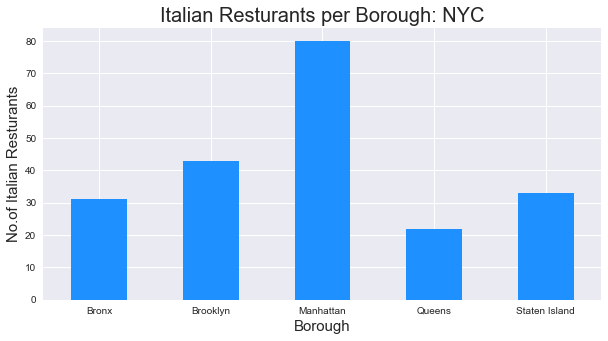

In [85]:
italian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Italian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

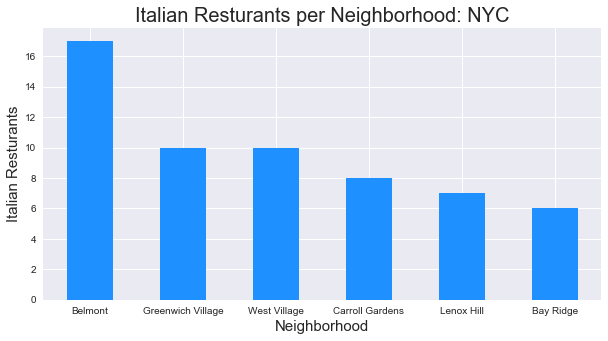

In [74]:
NOofNeigh = 6 # top number for graphing all the same past 6
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Resturants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [86]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

,Borough,Neighborhood,ID,Name
6,Bronx,Belmont,4acf80aef964a52025d420e3,Tino's Delicatessen
7,Bronx,Belmont,4af71916f964a520cf0522e3,Michaelangelo's Coal Fired Brick Oven Pizza Re...
8,Bronx,Belmont,59050f51b23dfa5f6649e678,Arthur Avenue Fiasco
9,Bronx,Belmont,4c9b9e7b9c663704b90463fd,Gerbasi Ristorante
10,Bronx,Belmont,4bb6470cef159c7465b275f7,Calabria Pork Store
11,Bronx,Belmont,4b5514c4f964a5207cda27e3,Enzo's
12,Bronx,Belmont,4af0fa29f964a52060e021e3,Antonio's Trattoria
13,Bronx,Belmont,4aa425bef964a5208e4520e3,Dominick's Restaurant
14,Bronx,Belmont,4c79d294278eb713f6a05580,Cafe al Mercato
15,Bronx,Belmont,4b5a4c8ff964a52049bb28e3,Emilia's Restaurant


In [91]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in italian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_ny),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
italian_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '5ec3a6cc6001fe001be6c749'}, 'response': {'venue': {'id': '511edb6de4b0d58346fd272d', 'name': "Patrizia's Of Woodlawn", 'contact': {'phone': '7188845700', 'formattedPhone': '(718) 884-5700'}, 'location': {'address': '4358 Katonah Ave', 'lat': 40.900638399332884, 'lng': -73.86772361835486, 'labeledLatLngs': [{'label': 'display', 'lat': 40.900638399332884, 'lng': -73.86772361835486}, {'label': 'entrance', 'lat': 40.900601, 'lng': -73.867611}], 'postalCode': '10470', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4358 Katonah Ave', 'Bronx, NY 10470', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-woodlawn/511edb6de4b0d58346fd272d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}],

0  511edb6de4b0d58346fd272d  Patrizia's Of Woodlawn     18     8.3    14
( 1 / 209 ) processed
{'meta': {'code': 200, 'requestId': '5ec3a6887828ae001b388042'}, 'response': {'venue': {'id': '4bf96ae65317a593d837017f', 'name': "Enzo's", 'contact': {'phone': '7184093828', 'formattedPhone': '(718) 409-3828'}, 'location': {'address': '1998 Williamsbridge Rd', 'lat': 40.854232311821725, 'lng': -73.85436243306151, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854232311821725, 'lng': -73.85436243306151}, {'label': 'entrance', 'lat': 40.854116, 'lng': -73.854132}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1998 Williamsbridge Rd', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enzos/4bf96ae65317a593d837017f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.

{'meta': {'code': 200, 'requestId': '5ec3a6419388d7001c1431c3'}, 'response': {'venue': {'id': '4b47f069f964a5208c4426e3', 'name': 'Pasta Pasta', 'contact': {'phone': '7188929634', 'formattedPhone': '(718) 892-9634'}, 'location': {'address': '2023 Williamsbridge Rd', 'lat': 40.85478806485715, 'lng': -73.85492881053774, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85478806485715, 'lng': -73.85492881053774}, {'label': 'entrance', 'lat': 40.854792, 'lng': -73.855184}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2023 Williamsbridge Rd', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pasta-pasta/4b47f069f964a5208c4426e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified'

{'meta': {'code': 200, 'requestId': '5ec3a6351835dd002883d7b7'}, 'response': {'venue': {'id': '5bb35ead2aff310039539a62', 'name': 'Boca Restaurant And Lounge', 'contact': {'phone': '9176881031', 'formattedPhone': '(917) 688-1031'}, 'location': {'address': '2458 Webster Ave', 'lat': 40.859905, 'lng': -73.892728, 'labeledLatLngs': [{'label': 'display', 'lat': 40.859905, 'lng': -73.892728}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2458 Webster Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/boca-restaurant-and-lounge/5bb35ead2aff310039539a62', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Modera

{'meta': {'code': 200, 'requestId': '5ec3a59d98205d001c52f90a'}, 'response': {'venue': {'id': '4acf80aef964a52025d420e3', 'name': "Tino's Delicatessen", 'contact': {'phone': '7187339879', 'formattedPhone': '(718) 733-9879'}, 'location': {'address': '2410 Arthur Ave', 'crossStreet': 'E. 187 St.', 'lat': 40.85588217093613, 'lng': -73.88716612015719, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85588217093613, 'lng': -73.88716612015719}, {'label': 'entrance', 'lat': 40.855816, 'lng': -73.887189}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2410 Arthur Ave (E. 187 St.)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tinos-delicatessen/4acf80aef964a52025d420e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suff

{'meta': {'code': 200, 'requestId': '5ec3a73ab57e88001c1d7610'}, 'response': {'venue': {'id': '4af71916f964a520cf0522e3', 'name': "Michaelangelo's Coal Fired Brick Oven Pizza Restaurant", 'contact': {'phone': '3475907650', 'formattedPhone': '(347) 590-7650'}, 'location': {'address': '2477 Arthur Ave', 'lat': 40.85741189614754, 'lng': -73.88646821282298, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85741189614754, 'lng': -73.88646821282298}, {'label': 'entrance', 'lat': 40.857301, 'lng': -73.886231}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2477 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/michaelangelos-coal-fired-brick-oven-pizza-restaurant/4af71916f964a520cf0522e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categor

{'meta': {'code': 200, 'requestId': '5ec3a67ab1cac0001d8146a1'}, 'response': {'venue': {'id': '59050f51b23dfa5f6649e678', 'name': 'Arthur Avenue Fiasco', 'contact': {'phone': '7186180806', 'formattedPhone': '(718) 618-0806'}, 'location': {'address': '2376 Arthur Ave', 'crossStreet': '187th street', 'lat': 40.854844, 'lng': -73.887908, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854844, 'lng': -73.887908}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2376 Arthur Ave (187th street)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arthur-avenue-fiasco/59050f51b23dfa5f6649e678', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'price'

{'meta': {'code': 200, 'requestId': '5ec3a4f529ce6a001bf49c51'}, 'response': {'venue': {'id': '4c9b9e7b9c663704b90463fd', 'name': 'Gerbasi Ristorante', 'contact': {}, 'location': {'address': '2384 Arthur Ave', 'lat': 40.85533418683699, 'lng': -73.88780782046945, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85533418683699, 'lng': -73.88780782046945}, {'label': 'entrance', 'lat': 40.855289, 'lng': -73.887951}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2384 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gerbasi-ristorante/4c9b9e7b9c663704b90463fd', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'http://www.ge

{'meta': {'code': 200, 'requestId': '5ec3a67469babe001bc7692a'}, 'response': {'venue': {'id': '4bb6470cef159c7465b275f7', 'name': 'Calabria Pork Store', 'contact': {'phone': '7183675145', 'formattedPhone': '(718) 367-5145'}, 'location': {'address': '2338 Arthur Ave', 'lat': 40.85414529023418, 'lng': -73.88877606219484, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85414529023418, 'lng': -73.88877606219484}, {'label': 'entrance', 'lat': 40.854096, 'lng': -73.888659}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2338 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/calabria-pork-store/4bb6470cef159c7465b275f7', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4

{'meta': {'code': 200, 'requestId': '5ec3a69114a126001b8d7d5d'}, 'response': {'venue': {'id': '4b5514c4f964a5207cda27e3', 'name': "Enzo's", 'contact': {'phone': '7187334455', 'formattedPhone': '(718) 733-4455'}, 'location': {'address': '2339 Arthur Ave', 'lat': 40.854354554251444, 'lng': -73.88864359312625, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854354554251444, 'lng': -73.88864359312625}, {'label': 'entrance', 'lat': 40.854339, 'lng': -73.888759}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2339 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enzos/4b5514c4f964a5207cda27e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tip

{'meta': {'code': 200, 'requestId': '5ec3a5aa71c428001be175c4'}, 'response': {'venue': {'id': '4af0fa29f964a52060e021e3', 'name': "Antonio's Trattoria", 'contact': {'phone': '7187336630', 'formattedPhone': '(718) 733-6630'}, 'location': {'address': '2370 Belmont Ave', 'lat': 40.854082862115455, 'lng': -73.88661644989108, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854082862115455, 'lng': -73.88661644989108}, {'label': 'entrance', 'lat': 40.854251, 'lng': -73.886599}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2370 Belmont Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/antonios-trattoria/4af0fa29f964a52060e021e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'veri

{'meta': {'code': 200, 'requestId': '5ec3a6b560ba08001b216fab'}, 'response': {'venue': {'id': '4aa425bef964a5208e4520e3', 'name': "Dominick's Restaurant", 'contact': {'phone': '7187332807', 'formattedPhone': '(718) 733-2807', 'twitter': 'dominicksrest'}, 'location': {'address': '2335 Arthur Ave', 'lat': 40.85421506482662, 'lng': -73.88876521498301, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85421506482662, 'lng': -73.88876521498301}, {'label': 'entrance', 'lat': 40.854251, 'lng': -73.888834}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2335 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dominicks-restaurant/4aa425bef964a5208e4520e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png

{'meta': {'code': 200, 'requestId': '5ec3a5ac71c428001be17af1'}, 'response': {'venue': {'id': '4c79d294278eb713f6a05580', 'name': 'Cafe al Mercato', 'contact': {'phone': '7183647681', 'formattedPhone': '(718) 364-7681'}, 'location': {'address': '2344 Arthur Ave', 'lat': 40.85417649340613, 'lng': -73.88808455700543, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85417649340613, 'lng': -73.88808455700543}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2344 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-al-mercato/4c79d294278eb713f6a05580', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message':

{'meta': {'code': 200, 'requestId': '5ec3a64e9388d7001c14507e'}, 'response': {'venue': {'id': '4b5a4c8ff964a52049bb28e3', 'name': "Emilia's Restaurant", 'contact': {'phone': '7183675915', 'formattedPhone': '(718) 367-5915'}, 'location': {'address': '2331 Arthur Ave', 'lat': 40.85412010500031, 'lng': -73.88890998498077, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85412010500031, 'lng': -73.88890998498077}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2331 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/emilias-restaurant/4b5a4c8ff964a52049bb28e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 16}, 'url': 'http://emiliasr

{'meta': {'code': 200, 'requestId': '5ec3a7129fcb92001bd65bb1'}, 'response': {'venue': {'id': '4aa193d5f964a520124120e3', 'name': "Mario's Restaurant & Catering", 'contact': {'phone': '7185841188', 'formattedPhone': '(718) 584-1188'}, 'location': {'address': '2342 Arthur Ave', 'crossStreet': 'at Crescent Ave', 'lat': 40.854243777661196, 'lng': -73.88843667516853, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854243777661196, 'lng': -73.88843667516853}, {'label': 'entrance', 'lat': 40.854189, 'lng': -73.88858}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2342 Arthur Ave (at Crescent Ave)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/marios-restaurant--catering/4aa193d5f964a520124120e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categ

{'meta': {'code': 200, 'requestId': '5ec3a6adc546f3001b7b7d76'}, 'response': {'venue': {'id': '4b5bc595f964a520431529e3', 'name': "Pasquale Riggaletto's", 'contact': {'phone': '7183656644', 'formattedPhone': '(718) 365-6644'}, 'location': {'address': '2311 Arthur Ave', 'lat': 40.853744601208376, 'lng': -73.88926386660914, 'labeledLatLngs': [{'label': 'display', 'lat': 40.853744601208376, 'lng': -73.88926386660914}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2311 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pasquale-riggalettos/4b5bc595f964a520431529e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 18}, 'price': {'tier':

{'meta': {'code': 200, 'requestId': '5ec3a4efdd0f85001bccc564'}, 'response': {'venue': {'id': '4cb0d382ef1b370419643e00', 'name': "David Greco's Arthur Avenue Trattoria", 'contact': {}, 'location': {'lat': 40.854031511759736, 'lng': -73.88887832314941, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854031511759736, 'lng': -73.88887832314941}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/david-grecos-arthur-avenue-trattoria/4cb0d382ef1b370419643e00', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 6, 'groups'

{'meta': {'code': 200, 'requestId': '5ec3a549660a9f001f07f36e'}, 'response': {'venue': {'id': '4bc22a22920eb713bcc51b2c', 'name': 'Tra Di Noi', 'contact': {'phone': '7182951784', 'formattedPhone': '(718) 295-1784', 'twitter': 'zeroottonovebrx'}, 'location': {'address': '622 E 187th St', 'lat': 40.855139534007634, 'lng': -73.88679442998631, 'labeledLatLngs': [{'label': 'display', 'lat': 40.855139534007634, 'lng': -73.88679442998631}, {'label': 'entrance', 'lat': 40.855035, 'lng': -73.886799}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['622 E 187th St', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tra-di-noi/4bc22a22920eb713bcc51b2c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True

{'meta': {'code': 200, 'requestId': '5ec3a59795feaf001b0e72b0'}, 'response': {'venue': {'id': '4bc67f1104e8b713a833362d', 'name': "Ann & Tony's - An Original Arthur Avenue Restaurant", 'contact': {'phone': '7189331469', 'formattedPhone': '(718) 933-1469', 'twitter': 'annandtonys'}, 'location': {'address': '2407 Arthur Ave', 'crossStreet': 'at E.187th Street', 'lat': 40.855704465427415, 'lng': -73.88744918407676, 'labeledLatLngs': [{'label': 'display', 'lat': 40.855704465427415, 'lng': -73.88744918407676}, {'label': 'entrance', 'lat': 40.855798, 'lng': -73.88751}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2407 Arthur Ave (at E.187th Street)', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ann--tonys--an-original-arthur-avenue-restaurant/4bc67f1104e8b713a833362d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', '

{'meta': {'code': 200, 'requestId': '5ec3a69b7828ae001b38a9b1'}, 'response': {'venue': {'id': '53ff939c498e6b601dfa3979', 'name': 'San Gennaro Ristorante', 'contact': {'phone': '7185620129', 'formattedPhone': '(718) 562-0129'}, 'location': {'address': '2329 Arthur Ave', 'lat': 40.854217, 'lng': -73.8891, 'labeledLatLngs': [{'label': 'display', 'lat': 40.854217, 'lng': -73.8891}, {'label': 'entrance', 'lat': 40.854126, 'lng': -73.88894}], 'postalCode': '10458', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2329 Arthur Ave', 'Bronx, NY 10458', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/san-gennaro-ristorante/53ff939c498e6b601dfa3979', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount'

{'meta': {'code': 200, 'requestId': '5ec3a6df949393001bac6896'}, 'response': {'venue': {'id': '4b3bdd2cf964a520f57c25e3', 'name': "Madison's", 'contact': {}, 'location': {'address': '5686 Riverdale Ave', 'lat': 40.90648305752465, 'lng': -73.90396530525271, 'labeledLatLngs': [{'label': 'display', 'lat': 40.90648305752465, 'lng': -73.90396530525271}, {'label': 'entrance', 'lat': 40.906494, 'lng': -73.904016}], 'postalCode': '10471', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5686 Riverdale Ave', 'Bronx, NY 10471', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/madisons/4b3bdd2cf964a520f57c25e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c0941735', 'name': 'Mediterranean Restaurant', 'pluralNam

{'meta': {'code': 200, 'requestId': '5ec3a5b471c428001be18bdd'}, 'response': {'venue': {'id': '4c9e1ef2542b224b70a3f09f', 'name': 'Lucca Italian Restaurant', 'contact': {'phone': '7188928282', 'formattedPhone': '(718) 892-8282'}, 'location': {'address': '3019 Westchester Ave', 'crossStreet': 'Hobart Ave', 'lat': 40.847676, 'lng': -73.831834, 'labeledLatLngs': [{'label': 'display', 'lat': 40.847676, 'lng': -73.831834}, {'label': 'entrance', 'lat': 40.84769, 'lng': -73.831699}], 'postalCode': '10461', 'cc': 'US', 'neighborhood': 'Pelham Bay', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3019 Westchester Ave (Hobart Ave)', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lucca-italian-restaurant/4c9e1ef2542b224b70a3f09f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

{'meta': {'code': 200, 'requestId': '5ec3a5ad1d67cb001bbf75db'}, 'response': {'venue': {'id': '4bb7c582cf2fc9b6dfc69e02', 'name': "Genio's Trattoria", 'contact': {'phone': '7188231646', 'formattedPhone': '(718) 823-1646'}, 'location': {'address': '1805 Edison Ave', 'lat': 40.847087, 'lng': -73.832349, 'labeledLatLngs': [{'label': 'display', 'lat': 40.847087, 'lng': -73.832349}], 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1805 Edison Ave', 'Bronx, NY 10461', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/genios-trattoria/4bb7c582cf2fc9b6dfc69e02', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}

{'meta': {'code': 200, 'requestId': '5ec3a50429ce6a001bf4bc64'}, 'response': {'venue': {'id': '4c9518076b35a143d5dc21dc', 'name': "Fratelli's", 'contact': {'phone': '7185472489', 'formattedPhone': '(718) 547-2489'}, 'location': {'address': '2507 Eastchester Rd', 'lat': 40.86301897888721, 'lng': -73.84360740712835, 'labeledLatLngs': [{'label': 'display', 'lat': 40.86301897888721, 'lng': -73.84360740712835}, {'label': 'entrance', 'lat': 40.863085, 'lng': -73.8436}], 'postalCode': '10469', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2507 Eastchester Rd', 'Bronx, NY 10469', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fratellis/4c9518076b35a143d5dc21dc', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 's

{'meta': {'code': 200, 'requestId': '5ec3a72977af030029b9fc59'}, 'response': {'venue': {'id': '4bfd8d06f61dc9b669309fde', 'name': "Tiny's Pizza & Pasta", 'contact': {'phone': '7182938346', 'formattedPhone': '(718) 293-8346'}, 'location': {'address': '1113 Grant Ave', 'lat': 40.8309295822695, 'lng': -73.91662582679406, 'labeledLatLngs': [{'label': 'display', 'lat': 40.8309295822695, 'lng': -73.91662582679406}, {'label': 'entrance', 'lat': 40.831001, 'lng': -73.91661}], 'postalCode': '10456', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1113 Grant Ave', 'Bronx, NY 10456', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tinys-pizza--pasta/4bfd8d06f61dc9b669309fde', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '5ec3a50629ce6a001bf4c20b'}, 'response': {'venue': {'id': '4a7e205ef964a52012f11fe3', 'name': 'Sofia Restorante Italiano', 'contact': {'phone': '7186804242', 'formattedPhone': '(718) 680-4242'}, 'location': {'address': '8406 3rd Ave', 'crossStreet': 'Betw. 84th & 85th St.', 'lat': 40.62484745920055, 'lng': -74.03052232818622, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62484745920055, 'lng': -74.03052232818622}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8406 3rd Ave (Betw. 84th & 85th St.)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sofia-restorante-italiano/4a7e205ef964a52012f11fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': 

{'meta': {'code': 200, 'requestId': '5ec3a684d03993001bd07e64'}, 'response': {'venue': {'id': '4ad62c95f964a5208d0521e3', 'name': 'Zio Toto', 'contact': {'phone': '7182388042', 'formattedPhone': '(718) 238-8042'}, 'location': {'address': '8407 3rd Ave', 'crossStreet': 'btwn 84th & 85th St', 'lat': 40.62479085034183, 'lng': -74.03055087900958, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62479085034183, 'lng': -74.03055087900958}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8407 3rd Ave (btwn 84th & 85th St)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zio-toto/4ad62c95f964a5208d0521e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d16d94173

{'meta': {'code': 200, 'requestId': '5ec3a6ed0be7b4001b488a90'}, 'response': {'venue': {'id': '4e732dff45dd41e9ccce1987', 'name': "Giacomo's Wood Fired Pizza & Trattoria", 'contact': {'phone': '7184396993', 'formattedPhone': '(718) 439-6993'}, 'location': {'address': '7902 3rd Ave', 'lat': 40.62853486510589, 'lng': -74.02905124266296, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62853486510589, 'lng': -74.02905124266296}, {'label': 'entrance', 'lat': 40.628483, 'lng': -74.029154}], 'postalCode': '11209', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7902 3rd Ave', 'Staten Island, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/giacomos-wood-fired-pizza--trattoria/4e732dff45dd41e9ccce1987', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 

{'meta': {'code': 200, 'requestId': '5ec3a78b1a4b0a002835c8e2'}, 'response': {'venue': {'id': '5071f049e4b05fb6c443ec8e', 'name': "Zitelli's Thin Crust Pizza and Bar", 'contact': {}, 'location': {'address': '8530-3rd Avenue', 'crossStreet': '86st & 3ave Corner', 'lat': 40.62355539009036, 'lng': -74.03096914529038, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62355539009036, 'lng': -74.03096914529038}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['8530-3rd Avenue (86st & 3ave Corner)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/zitellis-thin-crust-pizza-and-bar/5071f049e4b05fb6c443ec8e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735'

{'meta': {'code': 200, 'requestId': '5ec3a750b57e88001c1da828'}, 'response': {'venue': {'id': '5ce87094c4df1d002c9e1564', 'name': 'Baci', 'contact': {}, 'location': {'lat': 40.624347, 'lng': -74.030761, 'labeledLatLngs': [{'label': 'display', 'lat': 40.624347, 'lng': -74.030761}], 'postalCode': '11209', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/baci/5ce87094c4df1d002c9e1564', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 0, 'groups': []}, 'dislike': False, 'ok': False, 'allowMenuUrlEdit': True, 'beenHere': {'count': 0, 'unc

{'meta': {'code': 200, 'requestId': '5ec3a6d8c8cff2001c2c71d8'}, 'response': {'venue': {'id': '4e30a139483bb3fdc436a7e3', 'name': 'Villa Fiorita', 'contact': {'phone': '7188377950', 'formattedPhone': '(718) 837-7950'}, 'location': {'address': '7720 18th Ave', 'lat': 40.611931, 'lng': -73.997854, 'labeledLatLngs': [{'label': 'display', 'lat': 40.611931, 'lng': -73.997854}, {'label': 'entrance', 'lat': 40.611851, 'lng': -73.997718}], 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7720 18th Ave', 'Brooklyn, NY 11214', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/villa-fiorita/4e30a139483bb3fdc436a7e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'pric

{'meta': {'code': 200, 'requestId': '5ec3a5a595feaf001b0e9236'}, 'response': {'venue': {'id': '4ff37cb9e4b0b8fda883be7f', 'name': "Adelina's", 'contact': {'phone': '3477630152', 'formattedPhone': '(347) 763-0152', 'twitter': 'adelinas_wine', 'facebook': '348757038525931', 'facebookUsername': 'AdelinasBK', 'facebookName': "Adelina's"}, 'location': {'address': '159 Greenpoint Ave', 'crossStreet': 'at Leonard St.', 'lat': 40.730301301138475, 'lng': -73.95335193287592, 'labeledLatLngs': [{'label': 'display', 'lat': 40.730301301138475, 'lng': -73.95335193287592}], 'postalCode': '11222', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['159 Greenpoint Ave (at Leonard St.)', 'Brooklyn, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/adelinas_wine', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.n

{'meta': {'code': 200, 'requestId': '5ec3a7249fcb92001bd682f9'}, 'response': {'venue': {'id': '4ad8c329f964a520731421e3', 'name': "Joe's of Avenue U", 'contact': {'phone': '7184499285', 'formattedPhone': '(718) 449-9285'}, 'location': {'address': '287 Avenue U', 'lat': 40.596970812269824, 'lng': -73.9736772701698, 'labeledLatLngs': [{'label': 'display', 'lat': 40.596970812269824, 'lng': -73.9736772701698}, {'label': 'entrance', 'lat': 40.597039, 'lng': -73.973681}], 'postalCode': '11223', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['287 Avenue U', 'Brooklyn, NY 11223', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joes-of-avenue-u/4ad8c329f964a520731421e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': F

{'meta': {'code': 200, 'requestId': '5ec3a6e99da7ee001bfabdd0'}, 'response': {'venue': {'id': '5a98aed16a59506d7a60d67c', 'name': 'Carmenta’s', 'contact': {'phone': '7186765003', 'formattedPhone': '(718) 676-5003'}, 'location': {'address': '50 Starr St', 'crossStreet': 'Wilson Ave', 'lat': 40.701320324636875, 'lng': -73.92678265951356, 'labeledLatLngs': [{'label': 'display', 'lat': 40.701320324636875, 'lng': -73.92678265951356}], 'postalCode': '11221', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['50 Starr St (Wilson Ave)', 'Brooklyn, NY 11221', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/carmentas/5a98aed16a59506d7a60d67c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 21},

{'meta': {'code': 200, 'requestId': '5ec3a69978a484001b3cc5df'}, 'response': {'venue': {'id': '5a0740a3e1f22816d11723d5', 'name': 'Lillo', 'contact': {'phone': '3477630899', 'formattedPhone': '(347) 763-0899'}, 'location': {'address': '331 Henry Street', 'lat': 40.690199941477445, 'lng': -73.99654010450837, 'labeledLatLngs': [{'label': 'display', 'lat': 40.690199941477445, 'lng': -73.99654010450837}], 'postalCode': '11201', 'cc': 'US', 'neighborhood': 'Cobble Hill', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['331 Henry Street', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lillo/5a0740a3e1f22816d11723d5', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop'

{'meta': {'code': 200, 'requestId': '5ec3a5e9b4b684001bf21b5b'}, 'response': {'venue': {'id': '593329652632ec0582bd71df', 'name': 'Popina', 'contact': {'phone': '7182221901', 'formattedPhone': '(718) 222-1901', 'instagram': 'popinanyc', 'facebook': '1677291285901282', 'facebookUsername': 'PopinaNYC', 'facebookName': 'Popina NYC'}, 'location': {'address': '127 Columbia St', 'lat': 40.687419734537926, 'lng': -74.00143152860893, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687419734537926, 'lng': -74.00143152860893}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['127 Columbia St', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/popina/593329652632ec0582bd71df', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'su

{'meta': {'code': 200, 'requestId': '5ec3a6810cc1fd001ba44ae7'}, 'response': {'venue': {'id': '5044f749e4b0dd909d2cc123', 'name': 'Table 87', 'contact': {'phone': '7187979300', 'formattedPhone': '(718) 797-9300'}, 'location': {'address': '87 Atlantic Ave', 'lat': 40.69116378701994, 'lng': -73.99744297710961, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69116378701994, 'lng': -73.99744297710961}, {'label': 'entrance', 'lat': 40.691219, 'lng': -73.997355}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['87 Atlantic Ave', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/table-87/5044f749e4b0dd909d2cc123', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c

{'meta': {'code': 200, 'requestId': '5ec3a64fed78b8001bbbadde'}, 'response': {'venue': {'id': '49c4ff90f964a520da561fe3', 'name': 'Fragole', 'contact': {'phone': '7185227133', 'formattedPhone': '(718) 522-7133', 'twitter': 'fragoleny', 'facebook': '223164304439051', 'facebookName': 'Fragole Restaurant'}, 'location': {'address': '394 Court St', 'crossStreet': 'btwn 1st Pl & Carroll St.', 'lat': 40.680805, 'lng': -73.99689, 'labeledLatLngs': [{'label': 'display', 'lat': 40.680805, 'lng': -73.99689}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['394 Court St (btwn 1st Pl & Carroll St.)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/fragoleny', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'prim

{'meta': {'code': 200, 'requestId': '5ec3a6b37828ae001b38de87'}, 'response': {'venue': {'id': '4aa85f31f964a520075120e3', 'name': "Vinny's of Carroll Gardens", 'contact': {'phone': '7188755600', 'formattedPhone': '(718) 875-5600'}, 'location': {'address': '295 Smith St', 'crossStreet': 'Btw. Union & Sacket', 'lat': 40.681885, 'lng': -73.99357, 'labeledLatLngs': [{'label': 'display', 'lat': 40.681885, 'lng': -73.99357}, {'label': 'entrance', 'lat': 40.681897, 'lng': -73.993624}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['295 Smith St (Btw. Union & Sacket)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/vinnys-of-carroll-gardens/4aa85f31f964a520075120e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix

{'meta': {'code': 200, 'requestId': '5ec3a6e6c94979001baf4118'}, 'response': {'venue': {'id': '506cb4a8e4b02db545b4bf5c', 'name': "Claudine's", 'contact': {'phone': '7182374992', 'formattedPhone': '(718) 237-4992', 'facebook': '496394810370638', 'facebookName': "Claudine's"}, 'location': {'address': '311 Smith St', 'crossStreet': 'Smith St & Union St', 'lat': 40.681352187513205, 'lng': -73.99410672670723, 'labeledLatLngs': [{'label': 'display', 'lat': 40.681352187513205, 'lng': -73.99410672670723}, {'label': 'entrance', 'lat': 40.681307, 'lng': -73.99402}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['311 Smith St (Smith St & Union St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/claudines/506cb4a8e4b02db545b4bf5c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix':

{'meta': {'code': 200, 'requestId': '5ec3a5c7211536001bb432d0'}, 'response': {'venue': {'id': '5766ad56498ebf269c3737d2', 'name': 'Gersi', 'contact': {'phone': '3478895077', 'formattedPhone': '(347) 889-5077', 'twitter': 'gersirestaurant'}, 'location': {'address': '316 Court St', 'crossStreet': 'Sackett Street', 'lat': 40.68337949868895, 'lng': -73.99549228030504, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68337949868895, 'lng': -73.99549228030504}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['316 Court St (Sackett Street)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gersi/5766ad56498ebf269c3737d2', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5ec3a6b57828ae001b38e305'}, 'response': {'venue': {'id': '4a32d7ebf964a520a29a1fe3', 'name': 'Enoteca on Court', 'contact': {'phone': '7182431000', 'formattedPhone': '(718) 243-1000', 'twitter': 'enotecaoncourt1', 'facebook': '100640606612', 'facebookName': 'ENOTECA ON COURT STREET'}, 'location': {'address': '347 Court St', 'crossStreet': 'at Union St.', 'lat': 40.6822145298343, 'lng': -73.99594672669618, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6822145298343, 'lng': -73.99594672669618}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['347 Court St (at Union St.)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enoteca-on-court/4a32d7ebf964a520a29a1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/i

{'meta': {'code': 200, 'requestId': '5ec3a5b395feaf001b0eafc4'}, 'response': {'venue': {'id': '5001e284e4b0d8ae060e1035', 'name': 'Ciros on Smith', 'contact': {}, 'location': {'address': '307 Smith St', 'crossStreet': 'Union', 'lat': 40.68148804379713, 'lng': -73.99402221751436, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68148804379713, 'lng': -73.99402221751436}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['307 Smith St (Union)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ciros-on-smith/5001e284e4b0d8ae060e1035', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 3, 'message': 'Expensive', 'currency': '

{'meta': {'code': 200, 'requestId': '5ec3a566660a9f001f083340'}, 'response': {'venue': {'id': '4ab98ab8f964a520cf7f20e3', 'name': 'Marco Polo Ristorante', 'contact': {'phone': '7188525015', 'formattedPhone': '(718) 852-5015', 'twitter': 'marcopolorist'}, 'location': {'address': '345 Court St', 'crossStreet': 'at Union St', 'lat': 40.68231096732147, 'lng': -73.99591141723491, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68231096732147, 'lng': -73.99591141723491}, {'label': 'entrance', 'lat': 40.682241, 'lng': -73.995809}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['345 Court St (at Union St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/marco-polo-ristorante/4ab98ab8f964a520cf7f20e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/

{'meta': {'code': 200, 'requestId': '5ec3a50ddd0f85001bcd0911'}, 'response': {'venue': {'id': '4babeff5f964a52023d73ae3', 'name': "Mama Maria's", 'contact': {'phone': '7182462601', 'formattedPhone': '(718) 246-2601'}, 'location': {'address': '307 Court St', 'crossStreet': 'at Degraw St', 'lat': 40.68367019679082, 'lng': -73.99526165384304, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68367019679082, 'lng': -73.99526165384304}, {'label': 'entrance', 'lat': 40.683556, 'lng': -73.99518}], 'postalCode': '11231', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['307 Court St (at Degraw St)', 'Brooklyn, NY 11231', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mama-marias/4babeff5f964a52023d73ae3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '5ec3a71cf7706a001bd35007'}, 'response': {'venue': {'id': '5a00f3538496ca58fd9e2856', 'name': 'Evelina Restaurant', 'contact': {'phone': '9292980209', 'formattedPhone': '(929) 298-0209'}, 'location': {'address': '211 Dekalb Ave', 'crossStreet': 'Adelphi', 'lat': 40.689629, 'lng': -73.971018, 'labeledLatLngs': [{'label': 'display', 'lat': 40.689629, 'lng': -73.971018}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['211 Dekalb Ave (Adelphi)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/evelina-restaurant/5a00f3538496ca58fd9e2856', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 34}, 'url': 'http://e

{'meta': {'code': 200, 'requestId': '5ec3a59f006dce001cb9fb74'}, 'response': {'venue': {'id': '4afca48af964a520ab2422e3', 'name': 'Roman’s', 'contact': {'phone': '7186225300', 'formattedPhone': '(718) 622-5300'}, 'location': {'address': '243 Dekalb Ave', 'crossStreet': 'at Vanderbilt Ave.', 'lat': 40.68952914963263, 'lng': -73.96951802846388, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68952914963263, 'lng': -73.96951802846388}, {'label': 'entrance', 'lat': 40.689576, 'lng': -73.96954}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['243 Dekalb Ave (at Vanderbilt Ave.)', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/romans/4afca48af964a520ab2422e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': 

{'meta': {'code': 200, 'requestId': '5ec3a7016001fe001be73cc5'}, 'response': {'venue': {'id': '4c2d1eb17d85a593fa1452f3', 'name': 'Dino', 'contact': {'phone': '7182221999', 'formattedPhone': '(718) 222-1999', 'twitter': 'dinorestaurant'}, 'location': {'address': '222 Dekalb Ave', 'lat': 40.68953531738243, 'lng': -73.97046641110853, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68953531738243, 'lng': -73.97046641110853}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['222 Dekalb Ave', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dino/4c2d1eb17d85a593fa1452f3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 95}, 'url': 'http://www.

{'meta': {'code': 200, 'requestId': '5ec3a6ab3907e7001b625864'}, 'response': {'venue': {'id': '4d2ce735762fa143f40b7464', 'name': 'Da Nonna Rosa Cucina Italiana', 'contact': {'phone': '7187886225', 'formattedPhone': '(718) 788-6225', 'twitter': 'danonnarosany', 'facebook': '561909620647712', 'facebookUsername': 'danonnarosas', 'facebookName': 'Da Nonna Rosa'}, 'location': {'address': '140 7th Ave', 'lat': 40.67287215700924, 'lng': -73.97673164354593, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67287215700924, 'lng': -73.97673164354593}], 'postalCode': '11215', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['140 7th Ave', 'Brooklyn, NY 11215', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/da-nonna-rosa-cucina-italiana/4d2ce735762fa143f40b7464', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sq

{'meta': {'code': 200, 'requestId': '5ec3a6bd7828ae001b38f2d7'}, 'response': {'venue': {'id': '521a7e8a498e9a3defc15591', 'name': 'Casa Edesia Pizza and Grill', 'contact': {'phone': '7185522301', 'formattedPhone': '(718) 552-2301', 'twitter': 'casaedesia'}, 'location': {'address': '2006 Cropsey Ave', 'crossStreet': '20th Ave.', 'lat': 40.599751, 'lng': -74.002672, 'labeledLatLngs': [{'label': 'display', 'lat': 40.599751, 'lng': -74.002672}], 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2006 Cropsey Ave (20th Ave.)', 'Brooklyn, NY 11214', 'United States']}, 'canonicalUrl': 'https://foursquare.com/casaedesia', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place'

{'meta': {'code': 200, 'requestId': '5ec3a6f0c94979001baf5596'}, 'response': {'venue': {'id': '4afac880f964a520ad1822e3', 'name': "Pino's Ristorante", 'contact': {'phone': '7189961057', 'formattedPhone': '(718) 996-1057'}, 'location': {'address': '2025 Bath Ave', 'crossStreet': 'at Bay 25th St.', 'lat': 40.60095549134201, 'lng': -74.00080555696856, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60095549134201, 'lng': -74.00080555696856}, {'label': 'entrance', 'lat': 40.600952, 'lng': -74.00062}], 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2025 Bath Ave (at Bay 25th St.)', 'Brooklyn, NY 11214', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pinos-ristorante/4afac880f964a520ad1822e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_'

{'meta': {'code': 200, 'requestId': '5ec3a769b57e88001c1ddd24'}, 'response': {'venue': {'id': '57240d9b498e96aa8f33acb6', 'name': "Annabelle's", 'contact': {}, 'location': {'lat': 40.61867, 'lng': -74.021635, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61867, 'lng': -74.021635}], 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/annabelles/57240d9b498e96aa8f33acb6', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 6, 'groups': [{'type': 'others', 'count': 6, 'items': [{'id': '383549507', 'firstName': 'Antonietta', 'lastName': 'C', 'ph

{'meta': {'code': 200, 'requestId': '5ec3a6681835dd00288448f8'}, 'response': {'venue': {'id': '572d1d41498e2483c3bed970', 'name': 'Da Ciro Brooklyn', 'contact': {}, 'location': {'address': '458 Myrtle Ave', 'lat': 40.69314, 'lng': -73.967176, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69314, 'lng': -73.967176}], 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['458 Myrtle Ave', 'Brooklyn, NY 11205', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/da-ciro-brooklyn/572d1d41498e2483c3bed970', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 15, 'groups': [{'type': 'others', '

{'meta': {'code': 200, 'requestId': '5ec3a6699c6f59001c4969a3'}, 'response': {'venue': {'id': '59616e399ec399064afa985e', 'name': 'Fortina', 'contact': {'phone': '9179479399', 'formattedPhone': '(917) 947-9399'}, 'location': {'address': '445 Albee Square West', 'lat': 40.69103798233522, 'lng': -73.98314611621299, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69103798233522, 'lng': -73.98314611621299}], 'postalCode': '11201', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['445 Albee Square West', 'New York, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fortina/59616e399ec399064afa985e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 13}, 'price': {'tier': 3, 'messag

{'meta': {'code': 200, 'requestId': '5ec3a6920cc1fd001ba46ec0'}, 'response': {'venue': {'id': '4a522e5df964a52055b11fe3', 'name': "Luciano's", 'contact': {'phone': '7188556668', 'formattedPhone': '(718) 855-6668', 'facebook': '399513910087639', 'facebookUsername': 'lucianosbrooklynny', 'facebookName': 'Lucianos Brooklyn'}, 'location': {'address': '15 Metrotech Ctr', 'lat': 40.693985660266506, 'lng': -73.98542137408862, 'labeledLatLngs': [{'label': 'display', 'lat': 40.693985660266506, 'lng': -73.98542137408862}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['15 Metrotech Ctr', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lucianos/4a522e5df964a52055b11fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix

{'meta': {'code': 200, 'requestId': '5ec3a6b23907e7001b626648'}, 'response': {'venue': {'id': '4d9f5a9efc4f721e7e5a9d5f', 'name': 'Rucola', 'contact': {'phone': '7185763209', 'formattedPhone': '(718) 576-3209', 'twitter': 'rucolanyc'}, 'location': {'address': '190 Dean St', 'crossStreet': 'at Bond St', 'lat': 40.685659406438404, 'lng': -73.98576926297605, 'labeledLatLngs': [{'label': 'display', 'lat': 40.685659406438404, 'lng': -73.98576926297605}, {'label': 'entrance', 'lat': 40.685628, 'lng': -73.985863}], 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['190 Dean St (at Bond St)', 'Brooklyn, NY 11217', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rucola/4d9f5a9efc4f721e7e5a9d5f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffi

{'meta': {'code': 200, 'requestId': '5ec3a5feb4b684001bf2492d'}, 'response': {'venue': {'id': '59bfcdfb2079551e2b628d20', 'name': 'Camillo', 'contact': {}, 'location': {'address': '1146 Nostrand Ave', 'crossStreet': 'Rutland Rd.', 'lat': 40.65962621054929, 'lng': -73.95056843938069, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65962621054929, 'lng': -73.95056843938069}], 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1146 Nostrand Ave (Rutland Rd.)', 'Brooklyn, NY 11225', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/camillo/59bfcdfb2079551e2b628d20', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 12}, 'url': 'http://camillobk.com', 'price': {'tier': 

{'meta': {'code': 200, 'requestId': '5ec3a4af02a172001bae03dd'}, 'response': {'venue': {'id': '4dcabca41f6e2812677e3598', 'name': 'The Meatball Shop', 'contact': {'phone': '7185510520', 'formattedPhone': '(718) 551-0520', 'twitter': 'meatballers', 'facebook': '125706787475850', 'facebookUsername': 'themeatballshop', 'facebookName': 'The Meatball Shop'}, 'location': {'address': '170 Bedford Ave', 'crossStreet': 'btwn N 7th & N 8th St', 'lat': 40.71817031618937, 'lng': -73.95750154418721, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71817031618937, 'lng': -73.95750154418721}], 'postalCode': '11249', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['170 Bedford Ave (btwn N 7th & N 8th St)', 'Brooklyn, NY 11249', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-meatball-shop/4dcabca41f6e2812677e3598', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'short

{'meta': {'code': 200, 'requestId': '5ec3a66e1835dd00288455e9'}, 'response': {'venue': {'id': '5cdf51a01f74400039a39cdf', 'name': 'Dough Vale', 'contact': {'phone': '3478897400', 'formattedPhone': '(347) 889-7400', 'instagram': 'doughvale.restaurant', 'facebook': '682633222173934', 'facebookUsername': 'doughvalerestaurant', 'facebookName': 'Dough Vale'}, 'location': {'address': '330 S 3rd St', 'crossStreet': 'btwn Hooper & Keap St', 'lat': 40.709306, 'lng': -73.954056, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709306, 'lng': -73.954056}], 'postalCode': '11211', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['330 S 3rd St (btwn Hooper & Keap St)', 'New York, NY 11211', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dough-vale/5cdf51a01f74400039a39cdf', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https:

{'meta': {'code': 200, 'requestId': '5ec3a65471c428001be2f701'}, 'response': {'venue': {'id': '525c26bc11d277827d14468f', 'name': 'Campania Coal Fired Pizza', 'contact': {'phone': '3475174868', 'formattedPhone': '(347) 517-4868', 'facebook': '356672951137226', 'facebookName': 'Campania Coal Fired Pizza'}, 'location': {'address': '9824 4th Ave', 'crossStreet': 'btwn 99th St & Marine Ave', 'lat': 40.613465980586724, 'lng': -74.0332371696127, 'labeledLatLngs': [{'label': 'display', 'lat': 40.613465980586724, 'lng': -74.0332371696127}, {'label': 'entrance', 'lat': 40.613558, 'lng': -74.033235}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9824 4th Ave (btwn 99th St & Marine Ave)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/campania-coal-fired-pizza/525c26bc11d277827d14468f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian

{'meta': {'code': 200, 'requestId': '5ec3a73d14a126001b8f0068'}, 'response': {'venue': {'id': '55ff210c498ef9c10335dc0b', 'name': 'Positano', 'contact': {}, 'location': {'address': '10018 4th Ave', 'crossStreet': '101st Street', 'lat': 40.612384661710394, 'lng': -74.03405892854195, 'labeledLatLngs': [{'label': 'display', 'lat': 40.612384661710394, 'lng': -74.03405892854195}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10018 4th Ave (101st Street)', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/positano/55ff210c498ef9c10335dc0b', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 10}, 'price': {'tier': 2, 'message': 'Moderate', 'curren

{'meta': {'code': 200, 'requestId': '5ec3a7341e152c001b7b061e'}, 'response': {'venue': {'id': '4bc65dbc42419521181b041d', 'name': 'Piattini Ristorante', 'contact': {'phone': '7187590009', 'formattedPhone': '(718) 759-0009'}, 'location': {'address': '9824 4th Ave', 'lat': 40.613514, 'lng': -74.03325208333334, 'labeledLatLngs': [{'label': 'display', 'lat': 40.613514, 'lng': -74.03325208333334}], 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9824 4th Ave', 'Brooklyn, NY 11209', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/piattini-ristorante/4bc65dbc42419521181b041d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier': 2, 'message': 'Modera

{'meta': {'code': 200, 'requestId': '5ec3a6e81835dd0028856e16'}, 'response': {'venue': {'id': '472a027af964a520ea4b1fe3', 'name': 'Bacaro', 'contact': {'phone': '2129415060', 'formattedPhone': '(212) 941-5060'}, 'location': {'address': '136 Division St', 'crossStreet': 'at Ludlow St', 'lat': 40.714467897557796, 'lng': -73.9915893664933, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714467897557796, 'lng': -73.9915893664933}, {'label': 'entrance', 'lat': 40.714525, 'lng': -73.991611}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['136 Division St (at Ludlow St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bacaro/472a027af964a520ea4b1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, '

{'meta': {'code': 200, 'requestId': '5ec3a7110cc1fd001ba59245'}, 'response': {'venue': {'id': '4d21107c6e8c37042b58ff9f', 'name': 'Saggio Restaurant', 'contact': {'phone': '2127953080', 'formattedPhone': '(212) 795-3080', 'twitter': 'saggionyc', 'instagram': 'saggionyc'}, 'location': {'address': '829 W 181st St', 'crossStreet': 'at Cabrini Blvd', 'lat': 40.85142251681508, 'lng': -73.93976122140884, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85142251681508, 'lng': -73.93976122140884}], 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['829 W 181st St (at Cabrini Blvd)', 'New York, NY 10033', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/saggio-restaurant/4d21107c6e8c37042b58ff9f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suf

{'meta': {'code': 200, 'requestId': '5ec3a73b47e0d6001bdf244b'}, 'response': {'venue': {'id': '56d8e01d498ef1500ae7fbfe', 'name': 'Fumo', 'contact': {'phone': '6466926675', 'formattedPhone': '(646) 692-6675'}, 'location': {'address': '1600 Amsterdam Ave', 'crossStreet': '139th St', 'lat': 40.821411987945496, 'lng': -73.95049884872275, 'labeledLatLngs': [{'label': 'display', 'lat': 40.821411987945496, 'lng': -73.95049884872275}], 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1600 Amsterdam Ave (139th St)', 'New York, NY 10031', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/fumo/56d8e01d498ef1500ae7fbfe', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 22}, 

{'meta': {'code': 200, 'requestId': '5ec3a676882fc7001bbd8a07'}, 'response': {'venue': {'id': '4c956003f7cfa1cd2e2ebd15', 'name': 'Bettolona', 'contact': {'phone': '2127491125', 'formattedPhone': '(212) 749-1125', 'facebook': '145708885479882', 'facebookName': 'Bettolona'}, 'location': {'address': '3143 Broadway', 'crossStreet': 'btwn Tiemann Pl & La Salle St', 'lat': 40.81408384945623, 'lng': -73.95957422392542, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81408384945623, 'lng': -73.95957422392542}, {'label': 'entrance', 'lat': 40.814149, 'lng': -73.959731}], 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3143 Broadway (btwn Tiemann Pl & La Salle St)', 'New York, NY 10027', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bettolona/4c956003f7cfa1cd2e2ebd15', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian',

{'meta': {'code': 200, 'requestId': '5ec3a6ec9c6f59001c4a954c'}, 'response': {'venue': {'id': '4a22d7f9f964a520977d1fe3', 'name': 'Sant Ambroeus', 'contact': {'phone': '2125702211', 'formattedPhone': '(212) 570-2211', 'twitter': 'sant_ambroeus', 'facebook': '179539995429661', 'facebookUsername': 'SantAmbroeus', 'facebookName': 'Sant Ambroeus'}, 'location': {'address': '1000 Madison Ave', 'crossStreet': 'btwn 77th & 78th St.', 'lat': 40.77532770471081, 'lng': -73.96281878358091, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77532770471081, 'lng': -73.96281878358091}, {'label': 'entrance', 'lat': 40.775403, 'lng': -73.962961}], 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1000 Madison Ave (btwn 77th & 78th St.)', 'New York, NY 10075', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sant-ambroeus/4a22d7f9f964a520977d1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restauran

{'meta': {'code': 200, 'requestId': '5ec3a5a829ce6a001bf62fe1'}, 'response': {'venue': {'id': '4b3bedfaf964a5209e7e25e3', 'name': 'Antonucci', 'contact': {'phone': '2125705100', 'formattedPhone': '(212) 570-5100'}, 'location': {'address': '170 E 81st St', 'crossStreet': '3rd Avenue', 'lat': 40.77571064654, 'lng': -73.95660701282836, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77571064654, 'lng': -73.95660701282836}], 'postalCode': '10028', 'cc': 'US', 'neighborhood': 'Upper East Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['170 E 81st St (3rd Avenue)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/antonucci/4b3bedfaf964a5209e7e25e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fal

{'meta': {'code': 200, 'requestId': '5ec3a5a929ce6a001bf631a8'}, 'response': {'venue': {'id': '49fcd632f964a520e36e1fe3', 'name': 'Tiramisu', 'contact': {'phone': '2129889780', 'formattedPhone': '(212) 988-9780'}, 'location': {'address': '1410 3rd Ave', 'crossStreet': 'at 80th St.', 'lat': 40.77494597871838, 'lng': -73.95693214362441, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77494597871838, 'lng': -73.95693214362441}, {'label': 'entrance', 'lat': 40.775127, 'lng': -73.956876}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1410 3rd Ave (at 80th St.)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tiramisu/49fcd632f964a520e36e1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'prim

{'meta': {'code': 200, 'requestId': '5ec3a73b1e152c001b7b1651'}, 'response': {'venue': {'id': '57d9ddfe498e8a66d21ce8bb', 'name': 'Sistina', 'contact': {}, 'location': {'address': '24 E 81st St', 'crossStreet': 'Madison', 'lat': 40.777597, 'lng': -73.961685, 'labeledLatLngs': [{'label': 'display', 'lat': 40.777597, 'lng': -73.961685}, {'label': 'entrance', 'lat': 40.777715, 'lng': -73.961599}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['24 E 81st St (Madison)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sistina/57d9ddfe498e8a66d21ce8bb', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message': 'Moderat

{'meta': {'code': 200, 'requestId': '5ec3a778c8cff2001c2ddc66'}, 'response': {'venue': {'id': '4b5260e2f964a520587a27e3', 'name': 'Quattro Gatti Ristorante', 'contact': {'phone': '2125701073', 'formattedPhone': '(212) 570-1073'}, 'location': {'address': '205 E 81st St', 'crossStreet': 'at 3rd Ave.', 'lat': 40.775449496601894, 'lng': -73.95597669103729, 'labeledLatLngs': [{'label': 'display', 'lat': 40.775449496601894, 'lng': -73.95597669103729}, {'label': 'entrance', 'lat': 40.775502, 'lng': -73.955884}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['205 E 81st St (at 3rd Ave.)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/quattro-gatti-ristorante/4b5260e2f964a520587a27e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food

{'meta': {'code': 200, 'requestId': '5ec3a78b949393001bade9dd'}, 'response': {'venue': {'id': '4b623700f964a520a83c2ae3', 'name': 'Nica Trattoria', 'contact': {'phone': '2124725040', 'formattedPhone': '(212) 472-5040'}, 'location': {'address': '354 E 84th St', 'lat': 40.775688458031425, 'lng': -73.95057000240742, 'labeledLatLngs': [{'label': 'display', 'lat': 40.775688458031425, 'lng': -73.95057000240742}, {'label': 'entrance', 'lat': 40.775588, 'lng': -73.950621}], 'postalCode': '10028', 'cc': 'US', 'neighborhood': 'Yorkville', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['354 E 84th St', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/nica-trattoria/4b623700f964a520a83c2ae3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'pri

{'meta': {'code': 200, 'requestId': '5ec3a7acf7706a001bd4988c'}, 'response': {'venue': {'id': '4e4078922271a89dd083d07e', 'name': 'Felice 83', 'contact': {'phone': '2122494080', 'formattedPhone': '(212) 249-4080', 'twitter': 'felice_83', 'facebook': '228995607183713', 'facebookUsername': 'Felice.NewYorkCity', 'facebookName': 'Felice Wine Bar & Ristorante'}, 'location': {'address': '1593 1st Ave', 'crossStreet': 'at E 83rd St.', 'lat': 40.77486666568879, 'lng': -73.950868085548, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77486666568879, 'lng': -73.950868085548}], 'postalCode': '10028', 'cc': 'US', 'neighborhood': 'Yorkville', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1593 1st Ave (at E 83rd St.)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/felice-83/4e4078922271a89dd083d07e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortN

{'meta': {'code': 200, 'requestId': '5ec3a76860ba08001b2306f5'}, 'response': {'venue': {'id': '504bb0fae4b0d1cf33ca07d0', 'name': '83 1/2', 'contact': {'phone': '2127378312', 'formattedPhone': '(212) 737-8312', 'twitter': '83nahalf'}, 'location': {'address': '345 E 83rd St', 'crossStreet': 'at 1st Ave', 'lat': 40.77520589574406, 'lng': -73.95123198330161, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77520589574406, 'lng': -73.95123198330161}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['345 E 83rd St (at 1st Ave)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/83-12/504bb0fae4b0d1cf33ca07d0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {

{'meta': {'code': 200, 'requestId': '5ec3a72c69babe001bc907b4'}, 'response': {'venue': {'id': '4a84af7ff964a52055fd1fe3', 'name': "Arturo's", 'contact': {'phone': '2125354480', 'formattedPhone': '(212) 535-4480'}, 'location': {'address': '1617 York Ave', 'crossStreet': 'at E. 85th St.', 'lat': 40.77532146301959, 'lng': -73.94766206824356, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77532146301959, 'lng': -73.94766206824356}, {'label': 'entrance', 'lat': 40.775413, 'lng': -73.947704}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1617 York Ave (at E. 85th St.)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/arturos/4a84af7ff964a52055fd1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}

{'meta': {'code': 200, 'requestId': '5ec3a7aef7706a001bd49d57'}, 'response': {'venue': {'id': '4ad52027f964a5200a0221e3', 'name': 'Ginos Pizzeria', 'contact': {'phone': '2127175336', 'formattedPhone': '(212) 717-5336'}, 'location': {'address': '345 E 83rd St', 'crossStreet': 'at 1st Ave', 'lat': 40.775231503163006, 'lng': -73.9513015269503, 'labeledLatLngs': [{'label': 'display', 'lat': 40.775231503163006, 'lng': -73.9513015269503}], 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['345 E 83rd St (at 1st Ave)', 'New York, NY 10028', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ginos-pizzeria/4ad52027f964a5200a0221e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 

{'meta': {'code': 200, 'requestId': '5ec3a760c546f3001b7d11f0'}, 'response': {'venue': {'id': '5a823cbf1987ec6cdaea60dd', 'name': 'Mimmo Cucina Italiana', 'contact': {'phone': '9174095820', 'formattedPhone': '(917) 409-5820', 'instagram': 'mimmo.nyc'}, 'location': {'address': '1690 York Ave', 'crossStreet': 'Btwn East 88th & 89th Streets', 'lat': 40.777675, 'lng': -73.945781, 'labeledLatLngs': [{'label': 'display', 'lat': 40.777675, 'lng': -73.945781}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1690 York Ave (Btwn East 88th & 89th Streets)', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mimmo-cucina-italiana/5a823cbf1987ec6cdaea60dd', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primar

{'meta': {'code': 200, 'requestId': '5ec3a686b4b684001bf38286'}, 'response': {'venue': {'id': '596e2cd68496ca6c4dcde792', 'name': 'Bigoi Venezia', 'contact': {'phone': '9172620680', 'formattedPhone': '(917) 262-0680'}, 'location': {'address': '1415 2nd Ave', 'lat': 40.76995154071836, 'lng': -73.95748568997048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76995154071836, 'lng': -73.95748568997048}, {'label': 'entrance', 'lat': 40.77002, 'lng': -73.957677}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1415 2nd Ave', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bigoi-venezia/596e2cd68496ca6c4dcde792', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 's

{'meta': {'code': 200, 'requestId': '5ec3a701fb34b5001b4788c8'}, 'response': {'venue': {'id': '4a7f3e1af964a52069f31fe3', 'name': "Nino's", 'contact': {'phone': '2129880002', 'formattedPhone': '(212) 988-0002', 'twitter': 'ninoson1st', 'facebook': '111229048900007', 'facebookUsername': 'NinosNYC', 'facebookName': "NINO'S RESTAURANT NYC"}, 'location': {'address': '1354 1st Ave', 'crossStreet': 'btwn 72nd & 73rd St', 'lat': 40.76818, 'lng': -73.9555, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76818, 'lng': -73.9555}, {'label': 'entrance', 'lat': 40.768191, 'lng': -73.955505}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1354 1st Ave (btwn 72nd & 73rd St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ninos/4a7f3e1af964a52069f31fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian

{'meta': {'code': 200, 'requestId': '5ec3a7970be7b4001b4a0b51'}, 'response': {'venue': {'id': '4b775e32f964a520a6952ee3', 'name': 'Campagnola Restaurant', 'contact': {'phone': '2128611102', 'formattedPhone': '(212) 861-1102', 'twitter': 'campagnolanyc'}, 'location': {'address': '1382 1st Ave', 'crossStreet': 'at E 74th St.', 'lat': 40.76891229915657, 'lng': -73.95526786844196, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76891229915657, 'lng': -73.95526786844196}, {'label': 'entrance', 'lat': 40.768888, 'lng': -73.954996}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1382 1st Ave (at E 74th St.)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/campagnola-restaurant/4b775e32f964a520a6952ee3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/

{'meta': {'code': 200, 'requestId': '5ec3a6d00f5968001cc700f6'}, 'response': {'venue': {'id': '4b495fb4f964a520a36e26e3', 'name': 'Delizia 73 Ristorante & Pizza', 'contact': {'phone': '2125178888', 'formattedPhone': '(212) 517-8888', 'twitter': 'delizia73', 'facebook': '297453972412', 'facebookUsername': 'delizia73', 'facebookName': 'Delizia 73 Ristorante & Pizza'}, 'location': {'address': '1374 1st Ave', 'crossStreet': 'at E 73rd St', 'lat': 40.76873386522408, 'lng': -73.95533009269842, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76873386522408, 'lng': -73.95533009269842}, {'label': 'entrance', 'lat': 40.768647, 'lng': -73.955177}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1374 1st Ave (at E 73rd St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/delizia73', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restau

{'meta': {'code': 200, 'requestId': '5ec3a6d8e826ac001ba8c19d'}, 'response': {'venue': {'id': '3fd66200f964a52075e91ee3', 'name': 'Bella Blu', 'contact': {'phone': '2129884624', 'formattedPhone': '(212) 988-4624'}, 'location': {'address': '967 Lexington Ave', 'crossStreet': 'at E 70th St.', 'lat': 40.76924898445326, 'lng': -73.96304867967362, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76924898445326, 'lng': -73.96304867967362}, {'label': 'entrance', 'lat': 40.769258, 'lng': -73.962903}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['967 Lexington Ave (at E 70th St.)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bella-blu/3fd66200f964a52075e91ee3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix'

{'meta': {'code': 200, 'requestId': '5ec3a7bc618f43001be25ade'}, 'response': {'venue': {'id': '4a78f65ef964a520b7e61fe3', 'name': 'Mezzaluna Restaurants', 'contact': {'phone': '2125359600', 'formattedPhone': '(212) 535-9600'}, 'location': {'address': '1295 3rd Ave', 'crossStreet': 'btwn E 74th & E 75th St', 'lat': 40.771352488755774, 'lng': -73.95968198776245, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771352488755774, 'lng': -73.95968198776245}, {'label': 'entrance', 'lat': 40.771192, 'lng': -73.959341}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1295 3rd Ave (btwn E 74th & E 75th St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/mezzaluna-restaurants/4a78f65ef964a520b7e61fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/ca

{'meta': {'code': 200, 'requestId': '5ec3a784216785001b633c40'}, 'response': {'venue': {'id': '4aeb7568f964a52043c221e3', 'name': 'Sette Mezzo', 'contact': {'phone': '2124720400', 'formattedPhone': '(212) 472-0400'}, 'location': {'address': '969 Lexington Ave', 'lat': 40.769294621465185, 'lng': -73.96300133834809, 'labeledLatLngs': [{'label': 'display', 'lat': 40.769294621465185, 'lng': -73.96300133834809}, {'label': 'entrance', 'lat': 40.769306, 'lng': -73.962867}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['969 Lexington Ave', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sette-mezzo/4aeb7568f964a52043c221e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': 

{'meta': {'code': 200, 'requestId': '5ec3a6eeed78b8001bbd176d'}, 'response': {'venue': {'id': '42489a80f964a5208a201fe3', 'name': 'Celeste', 'contact': {'phone': '2128744559', 'formattedPhone': '(212) 874-4559'}, 'location': {'address': '502 Amsterdam Ave', 'crossStreet': 'btwn W 84th & W 85th St', 'lat': 40.786688640728016, 'lng': -73.97573727885354, 'labeledLatLngs': [{'label': 'display', 'lat': 40.786688640728016, 'lng': -73.97573727885354}, {'label': 'entrance', 'lat': 40.786652, 'lng': -73.975977}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['502 Amsterdam Ave (btwn W 84th & W 85th St)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/celeste/42489a80f964a5208a201fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/i

{'meta': {'code': 200, 'requestId': '5ec3a7986001fe001be89671'}, 'response': {'venue': {'id': '56afed04498e39e35747adf2', 'name': 'Pizzeria Sirenetta', 'contact': {'phone': '2127997401', 'formattedPhone': '(212) 799-7401', 'twitter': 'sirenetta_nyc', 'facebook': '1028158793906849', 'facebookUsername': 'sirenettanyc', 'facebookName': 'Pizzeria Sirenetta'}, 'location': {'address': '568 Amsterdam Avenue', 'crossStreet': 'W 87th Street', 'lat': 40.78864019118798, 'lng': -73.9742819869487, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78864019118798, 'lng': -73.9742819869487}], 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['568 Amsterdam Avenue (W 87th Street)', 'New York, NY 10024', 'United States']}, 'canonicalUrl': 'https://foursquare.com/sirenetta_nyc', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 

{'meta': {'code': 200, 'requestId': '5ec3a53d02a172001baf4b72'}, 'response': {'venue': {'id': '4c881d60a0ffb60ccda81fc5', 'name': 'Lincoln Ristorante', 'contact': {'phone': '2123596500', 'formattedPhone': '(212) 359-6500', 'twitter': 'lincolnnyc_65th'}, 'location': {'address': '142 W 65th St', 'lat': 40.77341322112094, 'lng': -73.98353503896452, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77341322112094, 'lng': -73.98353503896452}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['142 W 65th St', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lincoln-ristorante/4c881d60a0ffb60ccda81fc5', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d121941735', 'nam

{'meta': {'code': 200, 'requestId': '5ec3a7939da7ee001bfc3fc2'}, 'response': {'venue': {'id': '459395b7f964a52047401fe3', 'name': 'Cafe Fiorello', 'contact': {'phone': '2125955330', 'formattedPhone': '(212) 595-5330', 'instagram': 'cafefiorellonyc'}, 'location': {'address': '1900 Broadway', 'crossStreet': 'at W 63rd St', 'lat': 40.771735000935664, 'lng': -73.98199555811516, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771735000935664, 'lng': -73.98199555811516}], 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1900 Broadway (at W 63rd St)', 'New York, NY 10023', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-fiorello/459395b7f964a52047401fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True},

{'meta': {'code': 200, 'requestId': '5ec3a75214a126001b8f3348'}, 'response': {'venue': {'id': '5633bec0498e430fc8ba8f3c', 'name': 'La Vela Dining & Bar', 'contact': {}, 'location': {'address': '558 11th Avenue', 'crossStreet': '42nd & 43rd Streets', 'lat': 40.76115612063494, 'lng': -73.9981398392287, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76115612063494, 'lng': -73.9981398392287}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['558 11th Avenue (42nd & 43rd Streets)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-vela-dining--bar/5633bec0498e430fc8ba8f3c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 6}, 'price': {'tier

{'meta': {'code': 200, 'requestId': '5ec3a769c546f3001b7d2866'}, 'response': {'venue': {'id': '5c6377a0c824ae002c25c915', 'name': 'dell’anima', 'contact': {}, 'location': {'address': '600 11th Ave', 'lat': 40.762408, 'lng': -73.996936, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762408, 'lng': -73.996936}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['600 11th Ave', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dellanima/5c6377a0c824ae002c25c915', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 7}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 17, 'groups': [{'type': 'others', 'count': 17, 'it

{'meta': {'code': 200, 'requestId': '5ec3a6d70f5968001cc7119c'}, 'response': {'venue': {'id': '4adce863f964a5206c6221e3', 'name': "Tony's Di Napoli", 'contact': {'phone': '2122210100', 'formattedPhone': '(212) 221-0100', 'twitter': 'tonysdinapoli', 'facebook': '248474812310', 'facebookUsername': 'tonysdinapoli', 'facebookName': "Tony's DiNapoli"}, 'location': {'address': '147 W 43rd St', 'crossStreet': 'btwn 6th & 7th Ave', 'lat': 40.75643191257544, 'lng': -73.98550393311821, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75643191257544, 'lng': -73.98550393311821}], 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['147 W 43rd St (btwn 6th & 7th Ave)', 'New York, NY 10036', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tonys-di-napoli/4adce863f964a5206c6221e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 

{'meta': {'code': 200, 'requestId': '5ec3a617963d29001b4bd7ac'}, 'response': {'venue': {'id': '511d6006e4b0a486ec088c89', 'name': 'The Meatball Shop', 'contact': {'phone': '2122574363', 'formattedPhone': '(212) 257-4363', 'twitter': 'meatballers', 'facebook': '125706787475850', 'facebookUsername': 'themeatballshop', 'facebookName': 'The Meatball Shop'}, 'location': {'address': '200 9th Ave', 'crossStreet': 'btwn W 22nd St & W 23rd St', 'lat': 40.74598847169323, 'lng': -74.0016855226974, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74598847169323, 'lng': -74.0016855226974}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['200 9th Ave (btwn W 22nd St & W 23rd St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/the-meatball-shop/511d6006e4b0a486ec088c89', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'short

{'meta': {'code': 200, 'requestId': '5ec3a7979da7ee001bfc48d3'}, 'response': {'venue': {'id': '4533d338f964a5208f3b1fe3', 'name': 'Del Posto', 'contact': {'phone': '2124978090', 'formattedPhone': '(212) 497-8090', 'twitter': 'delposto', 'facebook': '98354212056', 'facebookUsername': 'DelPosto', 'facebookName': 'Del Posto'}, 'location': {'address': '85 10th Ave', 'crossStreet': 'at W 16th St', 'lat': 40.743439045312996, 'lng': -74.0074489865516, 'labeledLatLngs': [{'label': 'display', 'lat': 40.743439045312996, 'lng': -74.0074489865516}], 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['85 10th Ave (at W 16th St)', 'New York, NY 10011', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/del-posto/4533d338f964a5208f3b1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/c

{'meta': {'code': 200, 'requestId': '5ec3a75147e0d6001bdf5965'}, 'response': {'venue': {'id': '504b2a9ee4b006c435a465d3', 'name': 'Carbone', 'contact': {'phone': '2122543000', 'formattedPhone': '(212) 254-3000'}, 'location': {'address': '181 Thompson St', 'crossStreet': 'btwn Bleecker & W Houston St', 'lat': 40.72790327156426, 'lng': -74.00013635911864, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72790327156426, 'lng': -74.00013635911864}, {'label': 'entrance', 'lat': 40.727988, 'lng': -74.000154}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['181 Thompson St (btwn Bleecker & W Houston St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/carbone/504b2a9ee4b006c435a465d3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/fo

{'meta': {'code': 200, 'requestId': '5ec3a61a963d29001b4bdf2c'}, 'response': {'venue': {'id': '5ab53749446ea6289e41b0e6', 'name': 'Coco Pazzo Kitchen & Restaurant', 'contact': {'instagram': 'cocopazzonyc', 'facebook': '975855912539462', 'facebookUsername': 'cocopazzonyc', 'facebookName': 'Coco Pazzo Nyc'}, 'location': {'address': '160 Prince St', 'lat': 40.726036487672694, 'lng': -74.0015071234133, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726036487672694, 'lng': -74.0015071234133}], 'postalCode': '10012', 'cc': 'US', 'neighborhood': 'SoHo', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['160 Prince St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/coco-pazzo-kitchen--restaurant/5ab53749446ea6289e41b0e6', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/fo

{'meta': {'code': 200, 'requestId': '5ec3a694b4b684001bf3a33d'}, 'response': {'venue': {'id': '579e5513498e9ffc61b6ad8e', 'name': 'Piccola Cucina Enoteca', 'contact': {}, 'location': {'address': '184 Prince St', 'lat': 40.7263971644023, 'lng': -74.0021125319019, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7263971644023, 'lng': -74.0021125319019}, {'label': 'entrance', 'lat': 40.7263, 'lng': -74.002131}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['184 Prince St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/piccola-cucina-enoteca/579e5513498e9ffc61b6ad8e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 13}, 'url': 'http://ww

{'meta': {'code': 200, 'requestId': '5ec3a66a1d67cb001bc12063'}, 'response': {'venue': {'id': '3fd66200f964a52023e61ee3', 'name': 'Pepe Rosso To Go', 'contact': {'phone': '2126774555', 'formattedPhone': '(212) 677-4555'}, 'location': {'address': '149 Sullivan St', 'crossStreet': 'btwn Houston & Prince St', 'lat': 40.727226, 'lng': -74.001595, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727226, 'lng': -74.001595}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['149 Sullivan St (btwn Houston & Prince St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/pepe-rosso-to-go/3fd66200f964a52023e61ee3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d10c94173

{'meta': {'code': 200, 'requestId': '5ec3a7cd47b43d0023def1f2'}, 'response': {'venue': {'id': '556f4ef2498ee60139b28c72', 'name': 'Dante NYC', 'contact': {'phone': '2129825275', 'formattedPhone': '(212) 982-5275', 'twitter': 'dante_nyc', 'facebook': '472551882903503', 'facebookUsername': 'dantenewyorkcity', 'facebookName': 'Dante'}, 'location': {'address': '79-81 Macdougal St', 'crossStreet': 'btwn W Houston & Bleecker St', 'lat': 40.728847021360245, 'lng': -74.00162166908986, 'labeledLatLngs': [{'label': 'display', 'lat': 40.728847021360245, 'lng': -74.00162166908986}, {'label': 'entrance', 'lat': 40.728758, 'lng': -74.001647}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['79-81 Macdougal St (btwn W Houston & Bleecker St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dante-nyc/556f4ef2498ee60139b28c72', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Res

{'meta': {'code': 200, 'requestId': '5ec3a60c660a9f001f09abfd'}, 'response': {'venue': {'id': '51278a09e4b0b624edbc914c', 'name': 'Charlie Bird', 'contact': {'phone': '2122357133', 'formattedPhone': '(212) 235-7133', 'twitter': 'charliebirdnyc', 'facebook': '272383482891958', 'facebookUsername': 'charliebirdnyc', 'facebookName': 'Charlie Bird'}, 'location': {'address': '5 King St', 'crossStreet': 'at 6th Ave', 'lat': 40.727802, 'lng': -74.00285, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727802, 'lng': -74.00285}, {'label': 'entrance', 'lat': 40.727723, 'lng': -74.002859}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5 King St (at 6th Ave)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/charlie-bird/51278a09e4b0b624edbc914c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'ic

{'meta': {'code': 200, 'requestId': '5ec3a66c1d67cb001bc12579'}, 'response': {'venue': {'id': '56d92e05498e6c54b6325b19', 'name': 'San Carlo Osteria Piemonte', 'contact': {'phone': '2126251212', 'formattedPhone': '(212) 625-1212'}, 'location': {'address': '90 Thompson St', 'crossStreet': 'Spring St', 'lat': 40.725222953452004, 'lng': -74.00259414883078, 'labeledLatLngs': [{'label': 'display', 'lat': 40.725222953452004, 'lng': -74.00259414883078}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 Thompson St (Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/san-carlo-osteria-piemonte/56d92e05498e6c54b6325b19', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verifie

{'meta': {'code': 200, 'requestId': '5ec3a808b57e88001c1f4ad8'}, 'response': {'venue': {'id': '50e6eae5e4b06de013260a31', 'name': 'Bar Ciccio Alimentari', 'contact': {'phone': '6464769498', 'formattedPhone': '(646) 476-9498'}, 'location': {'address': '190 Avenue of the Americas', 'crossStreet': 'Spring St', 'lat': 40.726375, 'lng': -74.003369, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726375, 'lng': -74.003369}, {'label': 'entrance', 'lat': 40.726325, 'lng': -74.003451}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['190 Avenue of the Americas (Spring St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bar-ciccio-alimentari/50e6eae5e4b06de013260a31', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffi

{'meta': {'code': 200, 'requestId': '5ec3a76483525f002291d0e5'}, 'response': {'venue': {'id': '49ff2b51f964a520e86f1fe3', 'name': 'Il Mulino New York', 'contact': {'phone': '2126733783', 'formattedPhone': '(212) 673-3783', 'twitter': 'ilmulinony', 'facebook': '390871437591834', 'facebookUsername': 'ilmulinony', 'facebookName': 'Il Mulino New York'}, 'location': {'address': '86 W 3rd St', 'crossStreet': 'btwn Sullivan & Thompson St', 'lat': 40.729965066771406, 'lng': -73.99904758977722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.729965066771406, 'lng': -73.99904758977722}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['86 W 3rd St (btwn Sullivan & Thompson St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/il-mulino-new-york/49ff2b51f964a520e86f1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'sh

{'meta': {'code': 200, 'requestId': '5ec3a79b0de0d9001bd1abb4'}, 'response': {'venue': {'id': '543075b3498e283e38ad9dec', 'name': 'Cotenna', 'contact': {'phone': '6468610175', 'formattedPhone': '(646) 861-0175', 'twitter': 'cotenna', 'facebook': '1400762593522627', 'facebookName': 'Cotenna'}, 'location': {'address': '21 Bedford St', 'crossStreet': 'btwn Downing St and 6th Ave', 'lat': 40.729014, 'lng': -74.003539, 'labeledLatLngs': [{'label': 'display', 'lat': 40.729014, 'lng': -74.003539}, {'label': 'entrance', 'lat': 40.729035, 'lng': -74.003558}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['21 Bedford St (btwn Downing St and 6th Ave)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cotenna/543075b3498e283e38ad9dec', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix':

{'meta': {'code': 200, 'requestId': '5ec3a75e14a126001b8f4dbf'}, 'response': {'venue': {'id': '40f1d480f964a520680a1fe3', 'name': 'Hearth', 'contact': {'phone': '6466021300', 'formattedPhone': '(646) 602-1300', 'twitter': 'terroirny'}, 'location': {'address': '403 E 12th St', 'crossStreet': 'at 1st Ave', 'lat': 40.730032, 'lng': -73.983304, 'labeledLatLngs': [{'label': 'display', 'lat': 40.730032, 'lng': -73.983304}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['403 E 12th St (at 1st Ave)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/hearth/40f1d480f964a520680a1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d14e941735', 'name': 'American Restau

{'meta': {'code': 200, 'requestId': '5ec3a65d95feaf001b10359f'}, 'response': {'venue': {'id': '56cf3493cd106ae44d0c76a8', 'name': 'Speedy Romeo LES', 'contact': {'phone': '2125296300', 'formattedPhone': '(212) 529-6300', 'twitter': 'speedyromeony'}, 'location': {'address': '63 Clinton St', 'lat': 40.7194551163675, 'lng': -73.98491520066031, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7194551163675, 'lng': -73.98491520066031}], 'postalCode': '10002', 'cc': 'US', 'neighborhood': 'Lower East Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['63 Clinton St', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/speedy-romeo-les/56cf3493cd106ae44d0c76a8', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf5

{'meta': {'code': 200, 'requestId': '5ec3a6eae826ac001ba8ebce'}, 'response': {'venue': {'id': '4a149749f964a52055781fe3', 'name': 'Locanda Verde', 'contact': {'phone': '2129253797', 'formattedPhone': '(212) 925-3797', 'twitter': 'locandaverde'}, 'location': {'address': '377 Greenwich St', 'crossStreet': 'at N Moore St', 'lat': 40.719981, 'lng': -74.010002, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719981, 'lng': -74.010002}, {'label': 'entrance', 'lat': 40.719858, 'lng': -74.010038}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['377 Greenwich St (at N Moore St)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/locanda-verde/4a149749f964a52055781fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix

{'meta': {'code': 200, 'requestId': '5ec3a611bae9a2001b59cf79'}, 'response': {'venue': {'id': '4c7d4f1b8da18cfa1afc9ece', 'name': 'Osteria Morini', 'contact': {'phone': '2129658777', 'formattedPhone': '(212) 965-8777', 'twitter': 'osteriamorini', 'facebook': '134512136614416', 'facebookUsername': 'OsteriaMoriniSoho', 'facebookName': 'Osteria Morini Manhattan'}, 'location': {'address': '218 Lafayette St', 'crossStreet': 'btwn Kenmare & Spring St', 'lat': 40.72199, 'lng': -73.99779, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72199, 'lng': -73.99779}, {'label': 'entrance', 'lat': 40.721918, 'lng': -73.997636}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['218 Lafayette St (btwn Kenmare & Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/osteria-morini/4c7d4f1b8da18cfa1afc9ece', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'plura

{'meta': {'code': 200, 'requestId': '5ec3a675211536001bb5c1a3'}, 'response': {'venue': {'id': '4cc6222106c25481d7a4a047', 'name': 'Rubirosa Ristorante', 'contact': {'phone': '2129650500', 'formattedPhone': '(212) 965-0500', 'twitter': 'rubirosa_nyc', 'instagram': 'rubirosa_nyc', 'facebook': '168046486544976', 'facebookUsername': 'RubirosaNYC', 'facebookName': 'RubirosaNYC'}, 'location': {'address': '235 Mulberry St', 'crossStreet': 'btwn Prince & Spring St', 'lat': 40.72270625453151, 'lng': -73.99595719792266, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72270625453151, 'lng': -73.99595719792266}, {'label': 'entrance', 'lat': 40.722718, 'lng': -73.996058}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['235 Mulberry St (btwn Prince & Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rubirosa-ristorante/4cc6222106c25481d7a4a047', 'categories': [{'id': '4bf58dd8d489

{'meta': {'code': 200, 'requestId': '5ec3a648006dce001cbb7ff2'}, 'response': {'venue': {'id': '4c7d4f1b8da18cfa1afc9ece', 'name': 'Osteria Morini', 'contact': {'phone': '2129658777', 'formattedPhone': '(212) 965-8777', 'twitter': 'osteriamorini', 'facebook': '134512136614416', 'facebookUsername': 'OsteriaMoriniSoho', 'facebookName': 'Osteria Morini Manhattan'}, 'location': {'address': '218 Lafayette St', 'crossStreet': 'btwn Kenmare & Spring St', 'lat': 40.72199, 'lng': -73.99779, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72199, 'lng': -73.99779}, {'label': 'entrance', 'lat': 40.721918, 'lng': -73.997636}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['218 Lafayette St (btwn Kenmare & Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/osteria-morini/4c7d4f1b8da18cfa1afc9ece', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'plura

{'meta': {'code': 200, 'requestId': '5ec3a76214a126001b8f57fe'}, 'response': {'venue': {'id': '56d92e05498e6c54b6325b19', 'name': 'San Carlo Osteria Piemonte', 'contact': {'phone': '2126251212', 'formattedPhone': '(212) 625-1212'}, 'location': {'address': '90 Thompson St', 'crossStreet': 'Spring St', 'lat': 40.725222953452004, 'lng': -74.00259414883078, 'labeledLatLngs': [{'label': 'display', 'lat': 40.725222953452004, 'lng': -74.00259414883078}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['90 Thompson St (Spring St)', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/san-carlo-osteria-piemonte/56d92e05498e6c54b6325b19', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verifie

{'meta': {'code': 200, 'requestId': '5ec3a74fb1cac0001d8325d4'}, 'response': {'venue': {'id': '4a27289cf964a52062911fe3', 'name': "L'Artusi", 'contact': {'phone': '2122555757', 'formattedPhone': '(212) 255-5757', 'twitter': 'lartusi', 'facebook': '114779199447', 'facebookUsername': 'LArtusi', 'facebookName': "L'Artusi"}, 'location': {'address': '228 W 10th St', 'crossStreet': 'btwn Bleecker & Hudson St', 'lat': 40.733887817554255, 'lng': -74.00511448337453, 'labeledLatLngs': [{'label': 'display', 'lat': 40.733887817554255, 'lng': -74.00511448337453}, {'label': 'entrance', 'lat': 40.733857, 'lng': -74.005156}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['228 W 10th St (btwn Bleecker & Hudson St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lartusi/4a27289cf964a52062911fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Itali

{'meta': {'code': 200, 'requestId': '5ec3a7caf7706a001bd4dce5'}, 'response': {'venue': {'id': '49bd2326f964a5204d541fe3', 'name': 'I Sodi', 'contact': {'phone': '2124145774', 'formattedPhone': '(212) 414-5774'}, 'location': {'address': '105 Christopher St', 'crossStreet': 'at Bleecker St', 'lat': 40.733347779050895, 'lng': -74.00494719308303, 'labeledLatLngs': [{'label': 'display', 'lat': 40.733347779050895, 'lng': -74.00494719308303}, {'label': 'entrance', 'lat': 40.733356, 'lng': -74.004975}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['105 Christopher St (at Bleecker St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/i-sodi/49bd2326f964a5204d541fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix'

{'meta': {'code': 200, 'requestId': '5ec3a7101835dd002885ca96'}, 'response': {'venue': {'id': '543c7c63498e0a3393da47a2', 'name': 'Via Carota', 'contact': {'phone': '2122551962', 'formattedPhone': '(212) 255-1962'}, 'location': {'address': '51 Grove St', 'lat': 40.73305214118735, 'lng': -74.00357299198289, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73305214118735, 'lng': -74.00357299198289}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['51 Grove St', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/via-carota/543c7c63498e0a3393da47a2', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 155}, 'url': 'http://www.viacarota.com', 'price'

{'meta': {'code': 200, 'requestId': '5ec3a64d006dce001cbb8a44'}, 'response': {'venue': {'id': '41478600f964a520b91c1fe3', 'name': 'Extra Virgin', 'contact': {'phone': '2126919359', 'formattedPhone': '(212) 691-9359', 'twitter': 'extravirginnyc', 'instagram': 'extravirginnyc', 'facebook': '116920151659009', 'facebookName': 'Extra Virgin'}, 'location': {'address': '259 W 4th St', 'crossStreet': 'btw Charles & Perry St', 'lat': 40.73533960098671, 'lng': -74.00332725652542, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73533960098671, 'lng': -74.00332725652542}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['259 W 4th St (btw Charles & Perry St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/extra-virgin/41478600f964a520b91c1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon'

{'meta': {'code': 200, 'requestId': '5ec3a6f2e826ac001ba8fd69'}, 'response': {'venue': {'id': '4a552b26f964a520c4b31fe3', 'name': 'Malatesta Trattoria', 'contact': {'phone': '2127411207', 'formattedPhone': '(212) 741-1207'}, 'location': {'address': '649 Washington St', 'crossStreet': 'btwn 10th St & Christopher St', 'lat': 40.73280815951983, 'lng': -74.00852213960592, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73280815951983, 'lng': -74.00852213960592}, {'label': 'entrance', 'lat': 40.732856, 'lng': -74.008479}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['649 Washington St (btwn 10th St & Christopher St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/malatesta-trattoria/4a552b26f964a520c4b31fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3

{'meta': {'code': 200, 'requestId': '5ec3a7616d8c56001b41ead7'}, 'response': {'venue': {'id': '449e952ef964a520bc341fe3', 'name': 'Sant Ambroeus West Village', 'contact': {'phone': '2126049254', 'formattedPhone': '(212) 604-9254', 'twitter': 'sant_ambroeus', 'facebook': '179539995429661', 'facebookUsername': 'SantAmbroeus', 'facebookName': 'Sant Ambroeus'}, 'location': {'address': '259 W 4th St', 'crossStreet': 'Perry St.', 'lat': 40.73547913052668, 'lng': -74.00334772613444, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73547913052668, 'lng': -74.00334772613444}, {'label': 'entrance', 'lat': 40.735394, 'lng': -74.003222}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['259 W 4th St (Perry St.)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sant-ambroeus-west-village/449e952ef964a520bc341fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 

{'meta': {'code': 200, 'requestId': '5ec3a55502a172001baf80e4'}, 'response': {'venue': {'id': '451d254df964a5208b3a1fe3', 'name': "Gaetana's Cucina Italiana", 'contact': {'phone': '2126753913', 'formattedPhone': '(212) 675-3913', 'facebook': '140016359360380', 'facebookName': "Gaetana's Cucina Italiana"}, 'location': {'address': '143 Christopher St', 'crossStreet': 'at Greenwich St', 'lat': 40.73286359677627, 'lng': -74.00754392438093, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73286359677627, 'lng': -74.00754392438093}, {'label': 'entrance', 'lat': 40.732924, 'lng': -74.007709}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['143 Christopher St (at Greenwich St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gaetanas-cucina-italiana/451d254df964a5208b3a1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaura

{'meta': {'code': 200, 'requestId': '5ec3a7a1542890001b68ca03'}, 'response': {'venue': {'id': '4f324b8b19836c91c7c99bf0', 'name': "Anton's", 'contact': {'phone': '2126755059', 'formattedPhone': '(212) 675-5059'}, 'location': {'address': '570 Hudson St', 'crossStreet': 'at W 11th St', 'lat': 40.735694, 'lng': -74.00579, 'labeledLatLngs': [{'label': 'display', 'lat': 40.735694, 'lng': -74.00579}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['570 Hudson St (at W 11th St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/antons/4f324b8b19836c91c7c99bf0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 4}, 'url': 'http://antonsnyc.com', 'pr

{'meta': {'code': 200, 'requestId': '5ec3a6a6b4b684001bf3cb32'}, 'response': {'venue': {'id': '4d327cc72e56236a18991db4', 'name': 'Malaparte', 'contact': {'phone': '2122552122', 'formattedPhone': '(212) 255-2122'}, 'location': {'address': '753 Washington St', 'crossStreet': 'at Bethune St', 'lat': 40.736859, 'lng': -74.008093, 'labeledLatLngs': [{'label': 'display', 'lat': 40.736859, 'lng': -74.008093}, {'label': 'entrance', 'lat': 40.736867, 'lng': -74.008143}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['753 Washington St (at Bethune St)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/malaparte/4d327cc72e56236a18991db4', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'v

{'meta': {'code': 200, 'requestId': '5ec3a7ac9da7ee001bfc7836'}, 'response': {'venue': {'id': '56d0f1e2cd1060338dfecbd7', 'name': 'Suprema Provisions', 'contact': {'phone': '6469644994', 'formattedPhone': '(646) 964-4994', 'twitter': 'supremanyc'}, 'location': {'address': '305 Bleecker St', 'crossStreet': 'at 7th Ave S', 'lat': 40.73273693981835, 'lng': -74.00335491270052, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73273693981835, 'lng': -74.00335491270052}, {'label': 'entrance', 'lat': 40.732651, 'lng': -74.003722}], 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['305 Bleecker St (at 7th Ave S)', 'New York, NY 10014', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/suprema-provisions/56d0f1e2cd1060338dfecbd7', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/c

{'meta': {'code': 200, 'requestId': '5ec3a7161835dd002885d7dc'}, 'response': {'venue': {'id': '5962a53dc824ae6362e9e625', 'name': 'Osteria 106', 'contact': {'phone': '6468337614', 'formattedPhone': '(646) 833-7614'}, 'location': {'address': '53 W 106th St', 'crossStreet': 'Btwn Manhattan and Columbus', 'lat': 40.79882481969301, 'lng': -73.96179298262278, 'labeledLatLngs': [{'label': 'display', 'lat': 40.79882481969301, 'lng': -73.96179298262278}], 'postalCode': '10025', 'cc': 'US', 'neighborhood': 'Upper West Side', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['53 W 106th St (Btwn Manhattan and Columbus)', 'New York, NY 10025', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/osteria-106/5962a53dc824ae6362e9e625', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix':

{'meta': {'code': 200, 'requestId': '5ec3a66b95feaf001b105407'}, 'response': {'venue': {'id': '4abaa8bbf964a520518220e3', 'name': 'Lamarca Pasta', 'contact': {'phone': '2126746363', 'formattedPhone': '(212) 674-6363'}, 'location': {'address': '161 E 22nd St', 'crossStreet': 'at 3rd Ave.', 'lat': 40.738352, 'lng': -73.983848, 'labeledLatLngs': [{'label': 'display', 'lat': 40.738352, 'lng': -73.983848}, {'label': 'entrance', 'lat': 40.738352, 'lng': -73.983855}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['161 E 22nd St (at 3rd Ave.)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lamarca-pasta/4abaa8bbf964a520518220e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '5ec3a783c546f3001b7d6312'}, 'response': {'venue': {'id': '4afb2990f964a520a91b22e3', 'name': 'Maialino', 'contact': {'phone': '2127772410', 'formattedPhone': '(212) 777-2410', 'twitter': 'maialino_nyc'}, 'location': {'address': '2 Lexington Ave', 'crossStreet': 'at Gramercy Park N', 'lat': 40.7384419150589, 'lng': -73.98561005041564, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7384419150589, 'lng': -73.98561005041564}], 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2 Lexington Ave (at Gramercy Park N)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maialino/4afb2990f964a520a91b22e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'

{'meta': {'code': 200, 'requestId': '5ec3a5c5dd0f85001bceaaaa'}, 'response': {'venue': {'id': '551f21cd498e341e6a5e1276', 'name': "Patrizia's of Manhattan", 'contact': {'phone': '2125979999', 'formattedPhone': '(212) 597-9999'}, 'location': {'address': '462 2nd Ave', 'lat': 40.739815, 'lng': -73.979263, 'labeledLatLngs': [{'label': 'display', 'lat': 40.739815, 'lng': -73.979263}, {'label': 'entrance', 'lat': 40.739733, 'lng': -73.978702}], 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['462 2nd Ave', 'New York, NY 10016', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-manhattan/551f21cd498e341e6a5e1276', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCo

{'meta': {'code': 200, 'requestId': '5ec3a6abb4b684001bf3d51d'}, 'response': {'venue': {'id': '556cb8c6498e751e51fbcf41', 'name': 'Parm', 'contact': {'phone': '2127764927', 'formattedPhone': '(212) 776-4927'}, 'location': {'address': '250 Vesey St', 'crossStreet': 'West St', 'lat': 40.71451391801664, 'lng': -74.01626377138824, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71451391801664, 'lng': -74.01626377138824}], 'postalCode': '10080', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 Vesey St (West St)', 'New York, NY 10080', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/parm/556cb8c6498e751e51fbcf41', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'p

{'meta': {'code': 200, 'requestId': '5ec3a5c7dd0f85001bceaddc'}, 'response': {'venue': {'id': '57b4d7d7498e0b675b71f653', 'name': 'Osteria della Pace', 'contact': {'phone': '6466778580', 'formattedPhone': '(646) 677-8580'}, 'location': {'address': '101 Liberty St', 'crossStreet': 'at Greenwich St', 'lat': 40.7105541734127, 'lng': -74.01251945667114, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7105541734127, 'lng': -74.01251945667114}], 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['101 Liberty St (at Greenwich St)', 'New York, NY 10007', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/osteria-della-pace/57b4d7d7498e0b675b71f653', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fals

{'meta': {'code': 200, 'requestId': '5ec3a88bdf2774001b5f55d3'}, 'response': {'venue': {'id': '5d4861420372ce0007e23375', 'name': 'Maestro Pasta', 'contact': {}, 'location': {'address': '45 John St', 'lat': 40.709337, 'lng': -74.007769, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709337, 'lng': -74.007769}, {'label': 'entrance', 'lat': 40.709236, 'lng': -74.007894}], 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['45 John St', 'New York, NY 10038', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maestro-pasta/5d4861420372ce0007e23375', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 4}, 'url': 'http://www.maestropasta.com', 'price': {'tier': 2, 'message':

{'meta': {'code': 200, 'requestId': '5ec3a6a6882fc7001bbdf800'}, 'response': {'venue': {'id': '4bae3bd0f964a52009963be3', 'name': 'Brothers Ravioli', 'contact': {'phone': '7188437263', 'formattedPhone': '(718) 843-7263'}, 'location': {'address': '161-16 Crossbay Blvd', 'crossStreet': 'btwn 161 & 162 Ave.', 'lat': 40.655281880700706, 'lng': -73.83899102478131, 'labeledLatLngs': [{'label': 'display', 'lat': 40.655281880700706, 'lng': -73.83899102478131}, {'label': 'entrance', 'lat': 40.655231, 'lng': -73.83928}], 'postalCode': '11414', 'cc': 'US', 'city': 'Howard Beach', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['161-16 Crossbay Blvd (btwn 161 & 162 Ave.)', 'Howard Beach, NY 11414', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/brothers-ravioli/4bae3bd0f964a52009963be3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/i

{'meta': {'code': 200, 'requestId': '5ec3a622bae9a2001b59f6bb'}, 'response': {'venue': {'id': '4ba148f5f964a5201da937e3', 'name': 'Roma View Catering', 'contact': {'phone': '4146603940', 'formattedPhone': '(414) 660-3940'}, 'location': {'address': '160-05 Crossbay Blvd', 'crossStreet': '160th Ave', 'lat': 40.657220178842806, 'lng': -73.83909163427153, 'labeledLatLngs': [{'label': 'display', 'lat': 40.657220178842806, 'lng': -73.83909163427153}, {'label': 'entrance', 'lat': 40.657244, 'lng': -73.839117}], 'postalCode': '11414', 'cc': 'US', 'city': 'Howard Beach', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['160-05 Crossbay Blvd (160th Ave)', 'Howard Beach, NY 11414', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/roma-view-catering/4ba148f5f964a5201da937e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v

{'meta': {'code': 200, 'requestId': '5ec3a7643907e7001b63fd40'}, 'response': {'venue': {'id': '4b808501f964a5207b7930e3', 'name': 'Park Side', 'contact': {'phone': '7182719321', 'formattedPhone': '(718) 271-9321'}, 'location': {'address': '107-01 Corona Ave', 'lat': 40.74366966519212, 'lng': -73.85584371341943, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74366966519212, 'lng': -73.85584371341943}], 'postalCode': '11368', 'cc': 'US', 'neighborhood': 'South Corona', 'city': 'Corona', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['107-01 Corona Ave', 'Corona, NY 11368', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/park-side/4b808501f964a5207b7930e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 78}, 'url

{'meta': {'code': 200, 'requestId': '5ec3a820b57e88001c1f8083'}, 'response': {'venue': {'id': '4ba683e3f964a520f05939e3', 'name': 'Magna Restaurant', 'contact': {'phone': '7184453352', 'formattedPhone': '(718) 445-3352', 'twitter': 'magnarestaurant'}, 'location': {'address': '3525 Farrington St', 'lat': 40.763641385300986, 'lng': -73.83123608774204, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763641385300986, 'lng': -73.83123608774204}], 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3525 Farrington St', 'Flushing, NY 11354', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/magna-restaurant/4ba683e3f964a520f05939e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'t

{'meta': {'code': 200, 'requestId': '5ec3a618aba297001cb4da7c'}, 'response': {'venue': {'id': '57a13096498e42182b7df641', 'name': 'Oro Restaurant and Lounge', 'contact': {'phone': '7187291801', 'formattedPhone': '(718) 729-1801', 'facebook': '1711817435713231', 'facebookUsername': 'orolic', 'facebookName': 'Oro Restaurant & Lounge'}, 'location': {'address': '41-17 Crescent St', 'crossStreet': '41st ave and queens plaza', 'lat': 40.751803, 'lng': -73.939319, 'labeledLatLngs': [{'label': 'display', 'lat': 40.751803, 'lng': -73.939319}], 'postalCode': '11101', 'cc': 'US', 'city': 'Long Island City', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['41-17 Crescent St (41st ave and queens plaza)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/oro-restaurant-and-lounge/57a13096498e42182b7df641', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian'

{'meta': {'code': 200, 'requestId': '5ec3a625bae9a2001b59fd6f'}, 'response': {'venue': {'id': '5c6183b006fb60002ca6572b', 'name': "Patrizia's of Maspeth", 'contact': {'phone': '7187792083', 'formattedPhone': '(718) 779-2083', 'instagram': 'patriziasrestaurants', 'facebook': '564050220704479', 'facebookUsername': 'PatriziasOfMaspeth', 'facebookName': "Patrizia's Of Maspeth"}, 'location': {'address': '69-35 Grand Ave', 'crossStreet': 'at 69th Pl', 'lat': 40.726765, 'lng': -73.89427, 'labeledLatLngs': [{'label': 'display', 'lat': 40.726765, 'lng': -73.89427}], 'postalCode': '11378', 'cc': 'US', 'neighborhood': 'Maspeth', 'city': 'Maspeth', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['69-35 Grand Ave (at 69th Pl)', 'Maspeth, NY 11378', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/patrizias-of-maspeth/5c6183b006fb60002ca6572b', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName':

{'meta': {'code': 200, 'requestId': '5ec3a7c10be7b4001b4a6a18'}, 'response': {'venue': {'id': '4b89b361f964a520074c32e3', 'name': "Joe's Restaurant", 'contact': {'phone': '7184971300', 'formattedPhone': '(718) 497-1300', 'twitter': 'joerestaurant', 'facebook': '307889319365317', 'facebookName': "Joe'S Restaurant"}, 'location': {'address': '66-11 Forest Ave', 'lat': 40.707452, 'lng': -73.903355, 'labeledLatLngs': [{'label': 'display', 'lat': 40.707452, 'lng': -73.903355}], 'postalCode': '11385', 'cc': 'US', 'city': 'Ridgewood', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['66-11 Forest Ave', 'Ridgewood, NY 11385', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/joes-restaurant/4b89b361f964a520074c32e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'v

{'meta': {'code': 200, 'requestId': '5ec3a639963d29001b4c2387'}, 'response': {'venue': {'id': '4c50f9ae9d642d7f357fc6dc', 'name': 'Avellino Ristorante & Pizzeria', 'contact': {'phone': '7184590632', 'formattedPhone': '(718) 459-0632'}, 'location': {'address': '9703 64th Ave', 'crossStreet': 'at Queens Blvd', 'lat': 40.72976798666398, 'lng': -73.86045074006529, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72976798666398, 'lng': -73.86045074006529}], 'postalCode': '11374', 'cc': 'US', 'city': 'Rego Park', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['9703 64th Ave (at Queens Blvd)', 'Rego Park, NY 11374', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/avellino-ristorante--pizzeria/4c50f9ae9d642d7f357fc6dc', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': T

{'meta': {'code': 200, 'requestId': '5ec3a61a40a7ea001b75702a'}, 'response': {'venue': {'id': '4bb7ca5b1261d13a83e2e798', 'name': 'Papazzio Restaurant', 'contact': {'phone': '7182291962', 'formattedPhone': '(718) 229-1962', 'twitter': 'papazzio', 'facebook': '256961666820', 'facebookUsername': 'papazziorestaurant', 'facebookName': 'Papazzio Restaurant & Caterers'}, 'location': {'address': '3938 Bell Blvd', 'crossStreet': 'btw 39th & 41st Ave', 'lat': 40.764322841757284, 'lng': -73.77143715206627, 'labeledLatLngs': [{'label': 'display', 'lat': 40.764322841757284, 'lng': -73.77143715206627}], 'postalCode': '11361', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3938 Bell Blvd (btw 39th & 41st Ave)', 'Bayside, NY 11361', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/papazzio-restaurant/4bb7ca5b1261d13a83e2e798', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants'

{'meta': {'code': 200, 'requestId': '5ec3a76cad1ab4001c455e9c'}, 'response': {'venue': {'id': '4d4e0113869cf04dd10ce4ae', 'name': 'Trattoria Thirty Five', 'contact': {'phone': '7183523800', 'formattedPhone': '(718) 352-3800'}, 'location': {'address': '213-15 35th Ave', 'lat': 40.76885918000245, 'lng': -73.77401140965841, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76885918000245, 'lng': -73.77401140965841}], 'postalCode': '11361', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['213-15 35th Ave', 'Bayside, NY 11361', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trattoria-thirty-five/4d4e0113869cf04dd10ce4ae', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pl

{'meta': {'code': 200, 'requestId': '5ec3a717ed78b8001bbd7431'}, 'response': {'venue': {'id': '4b96ab2af964a520bfdc34e3', 'name': "Durso's Pasta & Ravioli Company", 'contact': {'phone': '7183581311', 'formattedPhone': '(718) 358-1311', 'twitter': 'dursospasta'}, 'location': {'address': '189-01 Crocheron Ave', 'crossStreet': 'at Utopia Pkwy', 'lat': 40.7633382071267, 'lng': -73.7930568493998, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7633382071267, 'lng': -73.7930568493998}], 'postalCode': '11358', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['189-01 Crocheron Ave (at Utopia Pkwy)', 'Flushing, NY 11358', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dursos-pasta--ravioli-company/4b96ab2af964a520bfdc34e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian

{'meta': {'code': 200, 'requestId': '5ec3a7329388d7001c1655b6'}, 'response': {'venue': {'id': '4bae85bef964a52073bc3be3', 'name': 'Il Bacco', 'contact': {'phone': '7182247657', 'formattedPhone': '(718) 224-7657'}, 'location': {'address': '253-24 Northern Blvd', 'crossStreet': 'at Little Neck Parkway', 'lat': 40.77117386483144, 'lng': -73.7350060892753, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77117386483144, 'lng': -73.7350060892753}], 'postalCode': '11362', 'cc': 'US', 'city': 'Little Neck', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['253-24 Northern Blvd (at Little Neck Parkway)', 'Little Neck, NY 11362', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/il-bacco/4bae85bef964a52073bc3be3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id'

{'meta': {'code': 200, 'requestId': '5ec3a7cfbe61c9001b47e952'}, 'response': {'venue': {'id': '4c1a9ed0b4e62d7fa119d893', 'name': 'La Grotta di Marcello', 'contact': {'phone': '7182248899', 'formattedPhone': '(718) 224-8899'}, 'location': {'address': '25412 Northern Blvd', 'lat': 40.771713643603405, 'lng': -73.7345497143007, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771713643603405, 'lng': -73.7345497143007}], 'postalCode': '11362', 'cc': 'US', 'city': 'Little Neck', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['25412 Northern Blvd', 'Little Neck, NY 11362', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-grotta-di-marcello/4c1a9ed0b4e62d7fa119d893', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 3},

{'meta': {'code': 200, 'requestId': '5ec3a76978a484001b3e9dc8'}, 'response': {'venue': {'id': '4cf009ae7b94370446c43653', 'name': 'Trattoria Lucia', 'contact': {'phone': '7183432185', 'formattedPhone': '(718) 343-2185', 'facebook': '222432854535472', 'facebookUsername': 'TrattoriaLucia', 'facebookName': 'Trattoria Lucia Restaurant'}, 'location': {'address': '24763 Jericho Tpke', 'crossStreet': 'at Commonwealth Blvd', 'lat': 40.72597625404059, 'lng': -73.71887985537106, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72597625404059, 'lng': -73.71887985537106}], 'postalCode': '11426', 'cc': 'US', 'city': 'Bellerose', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['24763 Jericho Tpke (at Commonwealth Blvd)', 'Bellerose, NY 11426', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/trattoria-lucia/4cf009ae7b94370446c43653', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian'

{'meta': {'code': 200, 'requestId': '5ec3a77747e0d6001bdfad81'}, 'response': {'venue': {'id': '4e4dc094bd41b76bef9292dd', 'name': 'Dante Restaurant', 'contact': {'phone': '7183803340', 'formattedPhone': '(718) 380-3340'}, 'location': {'address': '168-12 Union Tpke', 'lat': 40.72306991640908, 'lng': -73.79976608299833, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72306991640908, 'lng': -73.79976608299833}], 'postalCode': '11366', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['168-12 Union Tpke', 'Flushing, NY 11366', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dante-restaurant/4e4dc094bd41b76bef9292dd', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'url': 'http://www.

{'meta': {'code': 200, 'requestId': '5ec3a73bb9a389001c11647f'}, 'response': {'venue': {'id': '4a271f0cf964a5205c911fe3', 'name': 'Enoteca Maria', 'contact': {'phone': '7184472777', 'formattedPhone': '(718) 447-2777'}, 'location': {'address': '27 Hyatt St', 'crossStreet': 'btwn Central Ave & St Marks Pl', 'lat': 40.64194106346249, 'lng': -74.07732026660736, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64194106346249, 'lng': -74.07732026660736}, {'label': 'entrance', 'lat': 40.641983, 'lng': -74.077287}], 'postalCode': '10301', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['27 Hyatt St (btwn Central Ave & St Marks Pl)', 'Staten Island, NY 10301', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/enoteca-maria/4a271f0cf964a5205c911fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/im

{'meta': {'code': 200, 'requestId': '5ec3a665006dce001cbbbf53'}, 'response': {'venue': {'id': '590928301de7651d663ae087', 'name': "Marie's 2", 'contact': {'phone': '7184425100', 'formattedPhone': '(718) 442-5100'}, 'location': {'address': '5 Hyatt St', 'lat': 40.642176, 'lng': -74.076669, 'labeledLatLngs': [{'label': 'display', 'lat': 40.642176, 'lng': -74.076669}], 'postalCode': '10301', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5 Hyatt St', 'New York, NY 10301', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/maries-2/590928301de7651d663ae087', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d157941735', 'name': 'New American Restaurant', 'pluralName': 'New American Restaurants', 'shortName': '

{'meta': {'code': 200, 'requestId': '5ec3a80977af030029bbf7bf'}, 'response': {'venue': {'id': '4bcc8e3bb6c49c7422ed9391', 'name': "Tony's Brick Oven Pizzeria", 'contact': {'phone': '7188166516', 'formattedPhone': '(718) 816-6516'}, 'location': {'address': '1140 Bay St', 'lat': 40.61518049484888, 'lng': -74.06727894577533, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61518049484888, 'lng': -74.06727894577533}, {'label': 'entrance', 'lat': 40.615116, 'lng': -74.067262}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1140 Bay St', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tonys-brick-oven-pizzeria/4bcc8e3bb6c49c7422ed9391', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'prima

{'meta': {'code': 200, 'requestId': '5ec3a82cb57e88001c1f9c49'}, 'response': {'venue': {'id': '4b5b58dbf964a52088f628e3', 'name': 'Panini Grill', 'contact': {'phone': '7189812999', 'formattedPhone': '(718) 981-2999', 'twitter': 'paninigrill538'}, 'location': {'address': '538 Forest Ave', 'crossStreet': 'at Davis Ave', 'lat': 40.63013746773481, 'lng': -74.10815562240508, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63013746773481, 'lng': -74.10815562240508}], 'postalCode': '10310', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['538 Forest Ave (at Davis Ave)', 'Staten Island, NY 10310', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/panini-grill/4b5b58dbf964a52088f628e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': T

{'meta': {'code': 200, 'requestId': '5ec3a78883525f0022922131'}, 'response': {'venue': {'id': '4bf872974a67c928b57725cf', 'name': 'Cafe Milano', 'contact': {'phone': '7188189359', 'formattedPhone': '(718) 818-9359', 'facebook': '573268062774175', 'facebookName': 'Cafe Milano'}, 'location': {'address': '401 Forest Ave', 'crossStreet': 'at Walbrooke Ave', 'lat': 40.63101379177601, 'lng': -74.10290524363518, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63101379177601, 'lng': -74.10290524363518}, {'label': 'entrance', 'lat': 40.630987, 'lng': -74.102972}], 'postalCode': '10301', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['401 Forest Ave (at Walbrooke Ave)', 'Staten Island, NY 10301', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-milano/4bf872974a67c928b57725cf', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon':

{'meta': {'code': 200, 'requestId': '5ec3a82db57e88001c1f9fc5'}, 'response': {'venue': {'id': '4d51deac3062a1cd37786ba3', 'name': 'Bella Mama Rose Italian Restaurant', 'contact': {'phone': '7189810545', 'formattedPhone': '(718) 981-0545'}, 'location': {'address': '266 Morningstar Rd', 'lat': 40.63177190796811, 'lng': -74.1469496567026, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63177190796811, 'lng': -74.1469496567026}], 'postalCode': '10303', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['266 Morningstar Rd', 'Staten Island, NY 10303', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bella-mama-rose-italian-restaurant/4d51deac3062a1cd37786ba3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False,

{'meta': {'code': 200, 'requestId': '5ec3a6beb4b684001bf40067'}, 'response': {'venue': {'id': '4c0e67c085e19521d678eea5', 'name': 'bella mama rosa staten island', 'contact': {'phone': '7819810545', 'formattedPhone': '(781) 981-0545'}, 'location': {'address': '266 Morningstar Rd', 'crossStreet': 'Walker', 'lat': 40.63175, 'lng': -74.147008, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63175, 'lng': -74.147008}, {'label': 'entrance', 'lat': 40.63172, 'lng': -74.146822}], 'postalCode': '10303', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['266 Morningstar Rd (Walker)', 'Staten Island, NY 10303', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bella-mama-rosa-staten-island/4c0e67c085e19521d678eea5', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suff

{'meta': {'code': 200, 'requestId': '5ec3a72d1835dd0028860d3b'}, 'response': {'venue': {'id': '4bc73ff96501c9b696063e29', 'name': 'Little Italy Gourmet', 'contact': {'phone': '7189803663', 'formattedPhone': '(718) 980-3663'}, 'location': {'address': '1375 N Railroad Ave', 'lat': 40.57456522835696, 'lng': -74.11614983551179, 'labeledLatLngs': [{'label': 'display', 'lat': 40.57456522835696, 'lng': -74.11614983551179}, {'label': 'entrance', 'lat': 40.574696, 'lng': -74.116109}], 'postalCode': '10306', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1375 N Railroad Ave', 'Staten Island, NY 10306', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/little-italy-gourmet/4bc73ff96501c9b696063e29', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, '

{'meta': {'code': 200, 'requestId': '5ec3a8019fcb92001bd8782f'}, 'response': {'venue': {'id': '517dbe77e4b0eef580c875a3', 'name': "Piccolino's italian Restaurant", 'contact': {'facebook': '412101868843480', 'facebookUsername': 'PiccolinoStatenIsland', 'facebookName': 'Piccolino II Staten Island'}, 'location': {'address': '3935 Amboy Rd', 'lat': 40.55153846012257, 'lng': -74.1497458477389, 'labeledLatLngs': [{'label': 'display', 'lat': 40.55153846012257, 'lng': -74.1497458477389}], 'postalCode': '10308', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3935 Amboy Rd', 'Staten Island, NY 10308', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/piccolinos-italian-restaurant/517dbe77e4b0eef580c875a3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '5ec3a629aba297001cb50286'}, 'response': {'venue': {'id': '4c4a44f9bad7a593ee641daa', 'name': 'Giovannis Trattoria', 'contact': {'phone': '7182273914', 'formattedPhone': '(718) 227-3914', 'facebook': '199528246770408', 'facebookUsername': 'giovannistrattoriasi', 'facebookName': "Giovanni's Trattoria"}, 'location': {'address': '3800 richmond avenue', 'lat': 40.545119, 'lng': -74.165951, 'labeledLatLngs': [{'label': 'display', 'lat': 40.545119, 'lng': -74.165951}, {'label': 'entrance', 'lat': 40.545143, 'lng': -74.165882}], 'postalCode': '10312', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3800 richmond avenue', 'Staten Island, NY 10312', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/giovannis-trattoria/4c4a44f9bad7a593ee641daa', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'pr

{'meta': {'code': 200, 'requestId': '5ec3a7580cc1fd001ba638d3'}, 'response': {'venue': {'id': '57dadad2498e01667cb12067', 'name': 'Filoncino Cafe', 'contact': {}, 'location': {'address': '4569 Amboy Rd', 'lat': 40.542534, 'lng': -74.16553, 'labeledLatLngs': [{'label': 'display', 'lat': 40.542534, 'lng': -74.16553}], 'postalCode': '10312', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4569 Amboy Rd', 'Staten Island, NY 10312', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/filoncino-cafe/57dadad2498e01667cb12067', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 1, 'groups': [{'type': 'others'

{'meta': {'code': 200, 'requestId': '5ec3a6dfa2e538001b11d8d1'}, 'response': {'venue': {'id': '4bddbdea587b2d7fc5e25409', 'name': "Basilio's Inn", 'contact': {'phone': '7187206835', 'formattedPhone': '(718) 720-6835'}, 'location': {'address': '6 Galesville Ct', 'lat': 40.59736924074418, 'lng': -74.06367404509417, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59736924074418, 'lng': -74.06367404509417}, {'label': 'entrance', 'lat': 40.597347, 'lng': -74.06363}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['6 Galesville Ct', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/basilios-inn/4bddbdea587b2d7fc5e25409', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verif

{'meta': {'code': 200, 'requestId': '5ec3a79fc546f3001b7da3e5'}, 'response': {'venue': {'id': '4c2546d5a852c928e5a2e46c', 'name': 'Italianissimo', 'contact': {'phone': '7184424442', 'formattedPhone': '(718) 442-4442', 'twitter': 'bibisrestaurant'}, 'location': {'address': '107 McClean Ave', 'lat': 40.59859631693858, 'lng': -74.06561913541873, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59859631693858, 'lng': -74.06561913541873}, {'label': 'entrance', 'lat': 40.598551, 'lng': -74.065628}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['107 McClean Ave', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/italianissimo/4c2546d5a852c928e5a2e46c', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '5ec3a6c6b4b684001bf413ed'}, 'response': {'venue': {'id': '4b803abff964a520cd5e30e3', 'name': "Nino's", 'contact': {'phone': '7184483838', 'formattedPhone': '(718) 448-3838'}, 'location': {'address': '1110 Hylan Blvd', 'crossStreet': 'at Lamport Blvd', 'lat': 40.59836394993996, 'lng': -74.0799293299799, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59836394993996, 'lng': -74.0799293299799}, {'label': 'entrance', 'lat': 40.598426, 'lng': -74.079854}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1110 Hylan Blvd (at Lamport Blvd)', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ninos/4b803abff964a520cd5e30e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix

{'meta': {'code': 200, 'requestId': '5ec3a729ed78b8001bbd9f95'}, 'response': {'venue': {'id': '4be73347d4f7c9b66c992720', 'name': 'Bocelli', 'contact': {'phone': '7184206150', 'formattedPhone': '(718) 420-6150', 'twitter': 'bocelli_ny'}, 'location': {'address': '1250 Hylan Blvd', 'lat': 40.59741708805682, 'lng': -74.08432371429339, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59741708805682, 'lng': -74.08432371429339}, {'label': 'entrance', 'lat': 40.597194, 'lng': -74.084379}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1250 Hylan Blvd', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bocelli/4be73347d4f7c9b66c992720', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary':

{'meta': {'code': 200, 'requestId': '5ec3a7a2edbcad001bf073fe'}, 'response': {'venue': {'id': '4b9bdbd8f964a5201e2e36e3', 'name': 'Cafe Luna', 'contact': {'phone': '7183513235', 'formattedPhone': '(718) 351-3235'}, 'location': {'address': '1300 Hylan Blvd', 'lat': 40.5967635465473, 'lng': -74.08530628181195, 'labeledLatLngs': [{'label': 'display', 'lat': 40.5967635465473, 'lng': -74.08530628181195}, {'label': 'entrance', 'lat': 40.596561, 'lng': -74.085216}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1300 Hylan Blvd', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cafe-luna/4b9bdbd8f964a5201e2e36e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': Fa

{'meta': {'code': 200, 'requestId': '5ec3a6a471c428001be3afea'}, 'response': {'venue': {'id': '4d93fbaf8deb8cfa1ec436c0', 'name': 'DiSara', 'contact': {'phone': '7189792290', 'formattedPhone': '(718) 979-2290'}, 'location': {'address': '121 Roma Ave', 'lat': 40.562948999999996, 'lng': -74.102795, 'labeledLatLngs': [{'label': 'display', 'lat': 40.562948999999996, 'lng': -74.102795}, {'label': 'entrance', 'lat': 40.562865, 'lng': -74.102694}], 'postalCode': '10306', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['121 Roma Ave', 'Staten Island, NY 10306', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/disara/4d93fbaf8deb8cfa1ec436c0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount

{'meta': {'code': 200, 'requestId': '5ec3a89d5fb726001be4d3e0'}, 'response': {'venue': {'id': '596fd80235811b1c18aa0d51', 'name': 'Noto Casa Cucina', 'contact': {}, 'location': {'address': '150 K Greaves Lane', 'lat': 40.553886, 'lng': -74.14306, 'labeledLatLngs': [{'label': 'display', 'lat': 40.553886, 'lng': -74.14306}], 'postalCode': '10308', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['150 K Greaves Lane', 'New York, NY 10308', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/noto-casa-cucina/596fd80235811b1c18aa0d51', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 2}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 2, 'groups': [{'type': 'oth

{'meta': {'code': 200, 'requestId': '5ec3a7399c6f59001c4b478f'}, 'response': {'venue': {'id': '4ba42ec8f964a520c48938e3', 'name': 'Ciro', 'contact': {'phone': '7186050620', 'formattedPhone': '(718) 605-0620'}, 'location': {'address': '862 Huguenot Ave', 'lat': 40.53340597944858, 'lng': -74.1926452705801, 'labeledLatLngs': [{'label': 'display', 'lat': 40.53340597944858, 'lng': -74.1926452705801}, {'label': 'entrance', 'lat': 40.533329, 'lng': -74.192652}], 'postalCode': '10312', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['862 Huguenot Ave', 'Staten Island, NY 10312', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ciro/4ba42ec8f964a520c48938e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d

{'meta': {'code': 200, 'requestId': '5ec3a641660a9f001f0a2765'}, 'response': {'venue': {'id': '4eeccf5a29c28028de05a3b3', 'name': 'Giorgio & Son Italian Specialties', 'contact': {}, 'location': {'lat': 40.59142895967724, 'lng': -74.19064918839553, 'labeledLatLngs': [{'label': 'display', 'lat': 40.59142895967724, 'lng': -74.19064918839553}], 'postalCode': '10314', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY 10314', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/giorgio--son-italian-specialties/4eeccf5a29c28028de05a3b3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 0}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 1, 'g

{'meta': {'code': 200, 'requestId': '5ec3a79983525f00229248e7'}, 'response': {'venue': {'id': '4bb4d86886a8d13a83f8de7f', 'name': 'Sfoglia', 'contact': {'phone': '2128311402', 'formattedPhone': '(212) 831-1402', 'twitter': 'sfoglianyc'}, 'location': {'address': '1402 Lexington Ave', 'crossStreet': 'at E 92nd St', 'lat': 40.78341910209419, 'lng': -73.95276825117784, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78341910209419, 'lng': -73.95276825117784}, {'label': 'entrance', 'lat': 40.783552, 'lng': -73.952777}], 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1402 Lexington Ave (at E 92nd St)', 'New York, NY 10128', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/sfoglia/4bb4d86886a8d13a83f8de7f', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

{'meta': {'code': 200, 'requestId': '5ec3a73c9c6f59001c4b4d56'}, 'response': {'venue': {'id': '3fd66200f964a520d0e41ee3', 'name': "Lil' Frankie's", 'contact': {'phone': '2124204900', 'formattedPhone': '(212) 420-4900'}, 'location': {'address': '19 1st Ave', 'crossStreet': 'btwn E 1st & E 2nd St', 'lat': 40.723444771266365, 'lng': -73.9883282856349, 'labeledLatLngs': [{'label': 'display', 'lat': 40.723444771266365, 'lng': -73.9883282856349}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['19 1st Ave (btwn E 1st & E 2nd St)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lil-frankies/3fd66200f964a520d0e41ee3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d4898

{'meta': {'code': 200, 'requestId': '5ec3a73d1835dd0028863234'}, 'response': {'venue': {'id': '4d49d00ef53c8cfa78561c47', 'name': 'Gaia Italian Cafe', 'contact': {'phone': '6463503977', 'formattedPhone': '(646) 350-3977', 'facebook': '148927838500726', 'facebookUsername': 'gaiaitaliancafe', 'facebookName': 'Gaia Italian Cafe'}, 'location': {'address': '251 E Houston St', 'crossStreet': 'at Norfolk St', 'lat': 40.721959683805444, 'lng': -73.98540048918949, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721959683805444, 'lng': -73.98540048918949}, {'label': 'entrance', 'lat': 40.721735, 'lng': -73.985297}], 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['251 E Houston St (at Norfolk St)', 'New York, NY 10002', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/gaia-italian-cafe/4d49d00ef53c8cfa78561c47', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italia

{'meta': {'code': 200, 'requestId': '5ec3a6a498205d001c554e07'}, 'response': {'venue': {'id': '3fd66200f964a5209de41ee3', 'name': 'Supper', 'contact': {'phone': '2124777600', 'formattedPhone': '(212) 477-7600', 'twitter': 'suppernyc'}, 'location': {'address': '156 E 2nd St', 'crossStreet': 'btwn Ave A & B', 'lat': 40.72291486887997, 'lng': -73.9853185415268, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72291486887997, 'lng': -73.9853185415268}, {'label': 'entrance', 'lat': 40.722884, 'lng': -73.985261}], 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['156 E 2nd St (btwn Ave A & B)', 'New York, NY 10009', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/supper/3fd66200f964a5209de41ee3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 

{'meta': {'code': 200, 'requestId': '5ec3a752b9a389001c1199b6'}, 'response': {'venue': {'id': '53726183498e6a101ea7fd06', 'name': 'Bar Primi', 'contact': {'phone': '2122209100', 'formattedPhone': '(212) 220-9100', 'twitter': 'barprimi'}, 'location': {'address': '325 Bowery', 'crossStreet': 'at E 2nd St', 'lat': 40.72566109133918, 'lng': -73.99176120758057, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72566109133918, 'lng': -73.99176120758057}], 'postalCode': '10003', 'cc': 'US', 'neighborhood': 'NOHO', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['325 Bowery (at E 2nd St)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bar-primi/53726183498e6a101ea7fd06', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], '

{'meta': {'code': 200, 'requestId': '5ec3a6a9211536001bb639e0'}, 'response': {'venue': {'id': '52375dee11d23f06740c8f3e', 'name': 'Tutto Il Giorno Tribeca', 'contact': {}, 'location': {'address': '114 Franklin St', 'crossStreet': 'West Broadway', 'lat': 40.71865547863606, 'lng': -74.006215076712, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71865547863606, 'lng': -74.006215076712}], 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['114 Franklin St (West Broadway)', 'New York, NY 10013', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/tutto-il-giorno-tribeca/52375dee11d23f06740c8f3e', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 22}, 'url': 'http://tuttoi

{'meta': {'code': 200, 'requestId': '5ec3a6d2b4b684001bf42f1c'}, 'response': {'venue': {'id': '55e63b89498e3ed62f75cff3', 'name': "L'Amico", 'contact': {'phone': '2122014065', 'formattedPhone': '(212) 201-4065'}, 'location': {'address': '849 6th Ave', 'crossStreet': 'at W 30th St', 'lat': 40.74709570524947, 'lng': -73.98980498026418, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74709570524947, 'lng': -73.98980498026418}], 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['849 6th Ave (at W 30th St)', 'New York, NY 10001', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/lamico/55e63b89498e3ed62f75cff3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza 

{'meta': {'code': 200, 'requestId': '5ec3a5eedd0f85001bcf08fd'}, 'response': {'venue': {'id': '4bbb8986e452952190d154a4', 'name': 'Da Noi Fingerboard', 'contact': {'phone': '7187201650', 'formattedPhone': '(718) 720-1650', 'facebook': '100872369958006', 'facebookName': 'Da Noi - Fingerboard Rd., Staten Island'}, 'location': {'address': '136 Fingerboard Rd', 'lat': 40.60698963322474, 'lng': -74.06678011962381, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60698963322474, 'lng': -74.06678011962381}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['136 Fingerboard Rd', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/da-noi-fingerboard/4bbb8986e452952190d154a4', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian

{'meta': {'code': 200, 'requestId': '5ec3a5fd29ce6a001bf6f474'}, 'response': {'venue': {'id': '4b63728ff964a5208d7a2ae3', 'name': "Angie's Pizza & Restaurant", 'contact': {'phone': '7188167211', 'formattedPhone': '(718) 816-7211'}, 'location': {'address': '1377 Bay St', 'crossStreet': 'Evelyn Pl & Bay Street', 'lat': 40.610118, 'lng': -74.06298199999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.610118, 'lng': -74.06298199999999}, {'label': 'entrance', 'lat': 40.610102, 'lng': -74.063047}], 'postalCode': '10305', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1377 Bay St (Evelyn Pl & Bay Street)', 'Staten Island, NY 10305', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/angies-pizza--restaurant/4b63728ff964a5208d7a2ae3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/catego

{'meta': {'code': 200, 'requestId': '5ec3a8b4df2774001b5fb413'}, 'response': {'venue': {'id': '5956be26123a195de6701c2b', 'name': 'Porto Salvo', 'contact': {}, 'location': {'address': '424 E 161st St', 'lat': 40.823887357573966, 'lng': -73.91291020190582, 'labeledLatLngs': [{'label': 'display', 'lat': 40.823887357573966, 'lng': -73.91291020190582}], 'postalCode': '10451', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['424 E 161st St', 'New York, NY 10451', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/porto-salvo/5956be26123a195de6701c2b', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 5}, 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'}, 'likes': {'count': 10, 'grou

{'meta': {'code': 200, 'requestId': '5ec3a6d0882fc7001bbe58ba'}, 'response': {'venue': {'id': '54b1c94a498e09d5326f68fe', 'name': 'amata', 'contact': {'phone': '2123080830', 'formattedPhone': '(212) 308-0830'}, 'location': {'address': '209 E 56th St', 'crossStreet': '3rd Ave', 'lat': 40.75923625291223, 'lng': -73.96751482131353, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75923625291223, 'lng': -73.96751482131353}, {'label': 'entrance', 'lat': 40.759328, 'lng': -73.967131}], 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['209 E 56th St (3rd Ave)', 'New York, NY 10022', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/amata/54b1c94a498e09d5326f68fe', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}]

{'meta': {'code': 200, 'requestId': '5ec3a7a283525f0022925f9d'}, 'response': {'venue': {'id': '4af610e2f964a520bf0022e3', 'name': 'Scalinatella', 'contact': {'phone': '2013617878', 'formattedPhone': '(201) 361-7878'}, 'location': {'address': '201 E 61st St', 'crossStreet': 'at 3rd Ave', 'lat': 40.762761445552506, 'lng': -73.96556629404492, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762761445552506, 'lng': -73.96556629404492}], 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['201 E 61st St (at 3rd Ave)', 'New York, NY 10065', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/scalinatella/4af610e2f964a520bf0022e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCou

{'meta': {'code': 200, 'requestId': '5ec3a80a618f43001be30cce'}, 'response': {'venue': {'id': '463220f3f964a520fb451fe3', 'name': "Manetta's Ristorante", 'contact': {'phone': '7187866171', 'formattedPhone': '(718) 786-6171'}, 'location': {'address': '1076 Jackson Ave', 'crossStreet': 'btwn Hunters Point Ave. & 11th St.', 'lat': 40.742577, 'lng': -73.95194, 'labeledLatLngs': [{'label': 'display', 'lat': 40.742577, 'lng': -73.95194}], 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1076 Jackson Ave (btwn Hunters Point Ave. & 11th St.)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/manettas-ristorante/463220f3f964a520fb451fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '5ec3a6ad98205d001c55628f'}, 'response': {'venue': {'id': '4a1a3f6df964a5208b7a1fe3', 'name': 'Bella Via', 'contact': {'phone': '7183617510', 'formattedPhone': '(718) 361-7510', 'twitter': 'bellavialic'}, 'location': {'address': '4746 Vernon Blvd', 'crossStreet': 'at 47th Rd.', 'lat': 40.744218522452904, 'lng': -73.95366930142053, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744218522452904, 'lng': -73.95366930142053}], 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4746 Vernon Blvd (at 47th Rd.)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/bella-via/4a1a3f6df964a5208b7a1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'i

{'meta': {'code': 200, 'requestId': '5ec3a7210f5968001cc7b952'}, 'response': {'venue': {'id': '49f5bf5ef964a520b46b1fe3', 'name': 'Manducatis Rustica', 'contact': {'phone': '7189371312', 'formattedPhone': '(718) 937-1312', 'twitter': 'manducatisrusti'}, 'location': {'address': '4635 Vernon Blvd', 'crossStreet': 'btwn 46th Rd. & 47th Ave.', 'lat': 40.745959142740666, 'lng': -73.95302063397736, 'labeledLatLngs': [{'label': 'display', 'lat': 40.745959142740666, 'lng': -73.95302063397736}], 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4635 Vernon Blvd (btwn 46th Rd. & 47th Ave.)', 'Long Island City, NY 11101', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/manducatis-rustica/49f5bf5ef964a520b46b1fe3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/i

{'meta': {'code': 200, 'requestId': '5ec3a82877af030029bc3f3b'}, 'response': {'venue': {'id': '59dfff99419a9e7fcc5b5fa2', 'name': 'La Pecora Bianca', 'contact': {'phone': '2128999996', 'formattedPhone': '(212) 899-9996', 'twitter': 'pecorabiancanyc'}, 'location': {'address': '950 2nd Ave', 'lat': 40.755115567092155, 'lng': -73.96850858256543, 'labeledLatLngs': [{'label': 'display', 'lat': 40.755115567092155, 'lng': -73.96850858256543}], 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['950 2nd Ave', 'New York, NY 10022', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-pecora-bianca/59dfff99419a9e7fcc5b5fa2', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1c4941735', 'name': 'R

{'meta': {'code': 200, 'requestId': '5ec3a75cb9a389001c11b0f2'}, 'response': {'venue': {'id': '4acfb632f964a52076d520e3', 'name': 'Ristorante Grifone', 'contact': {'phone': '2124907275', 'formattedPhone': '(212) 490-7275', 'twitter': 'grifonenewyork'}, 'location': {'address': '244 E 46th St', 'crossStreet': 'btw 2nd and 3rd Ave', 'lat': 40.75266867515201, 'lng': -73.97083450475805, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75266867515201, 'lng': -73.97083450475805}, {'label': 'entrance', 'lat': 40.752516, 'lng': -73.970907}], 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['244 E 46th St (btw 2nd and 3rd Ave)', 'New York, NY 10017', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/ristorante-grifone/4acfb632f964a52076d520e3', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.

{'meta': {'code': 200, 'requestId': '5ec3a64240a7ea001b75ce4c'}, 'response': {'venue': {'id': '5cc3adaa838e59002cb4629d', 'name': 'Rezdôra', 'contact': {'twitter': 'rezdoranyc', 'instagram': 'rezdoranyc'}, 'location': {'address': '27 E 20th St', 'crossStreet': 'Broadway & Park Avenue South', 'lat': 40.738941, 'lng': -73.988862, 'labeledLatLngs': [{'label': 'display', 'lat': 40.738941, 'lng': -73.988862}], 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['27 E 20th St (Broadway & Park Avenue South)', 'New York, NY 10003', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/rezd%C3%B4ra/5cc3adaa838e59002cb4629d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 19}, 'u

{'meta': {'code': 200, 'requestId': '5ec3a6d6882fc7001bbe656f'}, 'response': {'venue': {'id': '53370455498e18d7e6607a1d', 'name': 'La Pizza & La Pasta', 'contact': {'phone': '2122292560', 'formattedPhone': '(212) 229-2560'}, 'location': {'address': '200 5th Ave', 'crossStreet': 'at W 23rd St', 'lat': 40.74244920189739, 'lng': -73.98998303334243, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74244920189739, 'lng': -73.98998303334243}], 'postalCode': '10010', 'cc': 'US', 'neighborhood': 'NoMad', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['200 5th Ave (at W 23rd St)', 'New York, NY 10010', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/la-pizza--la-pasta/53370455498e18d7e6607a1d', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 

{'meta': {'code': 200, 'requestId': '5ec3a6b21d67cb001bc1c423'}, 'response': {'venue': {'id': '593c0d2262420b7feccc3048', 'name': "Cecconi's", 'contact': {'phone': '7186503900', 'formattedPhone': '(718) 650-3900'}, 'location': {'address': '55 Water Street', 'lat': 40.703759, 'lng': -73.991548, 'labeledLatLngs': [{'label': 'display', 'lat': 40.703759, 'lng': -73.991548}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['55 Water Street', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cecconis/593c0d2262420b7feccc3048', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 72}, 'url': 'http://www.cecconisdumbo.com', 'price': {'tier': 2, 'message':

{'meta': {'code': 200, 'requestId': '5ec3a75b9388d7001c16b4c1'}, 'response': {'venue': {'id': '593c0d2262420b7feccc3048', 'name': "Cecconi's", 'contact': {'phone': '7186503900', 'formattedPhone': '(718) 650-3900'}, 'location': {'address': '55 Water Street', 'lat': 40.703759, 'lng': -73.991548, 'labeledLatLngs': [{'label': 'display', 'lat': 40.703759, 'lng': -73.991548}], 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['55 Water Street', 'Brooklyn, NY 11201', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/cecconis/593c0d2262420b7feccc3048', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'verified': True, 'stats': {'tipCount': 72}, 'url': 'http://www.cecconisdumbo.com', 'price': {'tier': 2, 'message':

{'meta': {'code': 200, 'requestId': '5ec3a7991e152c001b7bed3a'}, 'response': {'venue': {'id': '4c091311a1b32d7f5efb96f0', 'name': "Certo's Gourmet Foods & Caterers", 'contact': {'phone': '7189840623', 'formattedPhone': '(718) 984-0623'}, 'location': {'address': '27 Seguine Ave', 'crossStreet': 'at Amboy Rd', 'lat': 40.525838055120666, 'lng': -74.20111662376696, 'labeledLatLngs': [{'label': 'display', 'lat': 40.525838055120666, 'lng': -74.20111662376696}, {'label': 'entrance', 'lat': 40.525554, 'lng': -74.200919}], 'postalCode': '10309', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['27 Seguine Ave (at Amboy Rd)', 'Staten Island, NY 10309', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/certos-gourmet-foods--caterers/4c091311a1b32d7f5efb96f0', 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
204,Manhattan,Flatiron,53370455498e18d7e6607a1d,La Pizza & La Pasta,200,8.6,57
205,Brooklyn,Fulton Ferry,593c0d2262420b7feccc3048,Cecconi's,332,8.1,72
206,Brooklyn,Dumbo,593c0d2262420b7feccc3048,Cecconi's,332,8.1,72
207,Staten Island,Prince's Bay,0,0,0,0.0,0
208,Staten Island,Lighthouse Hill,5079ccdce4b065f1dd8155ad,Casa verde,8,8.0,3


In [92]:
italian_rest_stats_ny1=italian_rest_stats_ny
italian_rest_stats_ny.to_csv('italian_rest_stats_ny_csv.csv') # I continue to save data to a .csv as I move through this project

In [106]:
italian_rest_stats_ny.shape

(209, 7)

In [107]:
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
Borough         209 non-null object
Neighborhood    209 non-null object
ID              209 non-null object
Name            209 non-null object
Likes           209 non-null object
Rating          209 non-null float64
Tips            209 non-null object
dtypes: float64(1), object(6)
memory usage: 11.5+ KB


## Analysis <a name="analysis"></a>

Lets perform some exploratory data analysis and derive some additional info from the data.

In [108]:
italian_rest_stats_ny['Likes']=italian_rest_stats_ny['Likes'].astype('float64')
italian_rest_stats_ny['Tips']=italian_rest_stats_ny['Tips'].astype('float64')
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
Borough         209 non-null object
Neighborhood    209 non-null object
ID              209 non-null object
Name            209 non-null object
Likes           209 non-null float64
Rating          209 non-null float64
Tips            209 non-null float64
dtypes: float64(3), object(4)
memory usage: 11.5+ KB


In [109]:
italian_rest_stats_ny.describe()

,Likes,Rating,Tips
count,209.000000,209.000000,209.00000
mean,150.033493,7.272249,57.23445
std,306.691266,2.355557,123.86864
min,0.000000,0.000000,0.00000
25%,12.000000,7.200000,6.00000
50%,33.000000,8.000000,16.00000
75%,105.000000,8.500000,41.00000
max,2491.000000,9.500000,1136.00000


In [110]:
# Resturant with maximum Likes
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              4cc6222106c25481d7a4a047
Name                 Rubirosa Ristorante
Likes                               2491
Rating                               9.3
Tips                                 824
Name: 116, dtype: object

In [111]:
# Resturant with maximum Ratings
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a98aed16a59506d7a60d67c
Name                          Carmenta’s
Likes                                 57
Rating                               9.5
Tips                                  21
Name: 41, dtype: object

In [112]:
# Resturant with maximum Tips
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Tips'].idxmax()]

Borough                    Staten Island
Neighborhood               West Brighton
ID              4b5b58dbf964a52088f628e3
Name                        Panini Grill
Likes                                 21
Rating                               8.6
Tips                                1136
Name: 157, dtype: object

In [113]:
ny_neighborhood_stats=italian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
12,Bushwick,9.500
11,Boerum Hill,9.100
53,Little Italy,9.000
45,Hamilton Heights,9.000
87,Tribeca,8.900
44,Greenwich Village,8.860
81,Soho,8.850
68,North Side,8.800
66,Noho,8.725
24,Corona,8.700


In [114]:
ny_borough_stats=italian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.201250
1,Brooklyn,7.404651
0,Bronx,7.364516
3,Queens,7.127273
4,Staten Island,4.857576


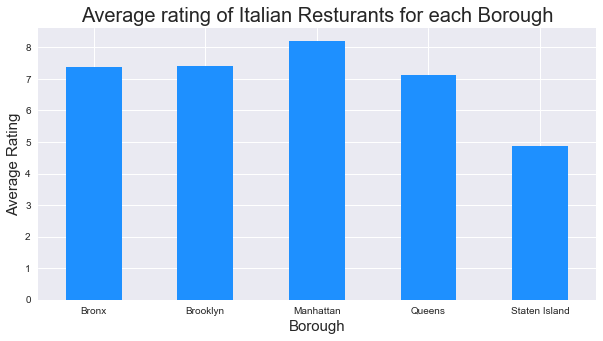

In [115]:
italian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Italian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [116]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
2,Auburndale,8.200000
11,Boerum Hill,9.100000
12,Bushwick,9.500000
13,Carnegie Hill,8.500000
17,City Island,8.300000
20,Clinton Hill,8.650000
21,Cobble Hill,8.366667
24,Corona,8.700000
27,Dumbo,8.100000
29,East Village,8.600000


In [117]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Auburndale,40.761730,-73.791762,8.200000
1,Brooklyn,Boerum Hill,40.685683,-73.983748,9.100000
2,Brooklyn,Bushwick,40.698116,-73.925258,9.500000
3,Manhattan,Carnegie Hill,40.782683,-73.953256,8.500000
4,Bronx,City Island,40.847247,-73.786488,8.300000
5,Brooklyn,Clinton Hill,40.693229,-73.967843,8.650000
6,Brooklyn,Cobble Hill,40.687920,-73.998561,8.366667
7,Queens,Corona,40.742382,-73.856825,8.700000
8,Brooklyn,Dumbo,40.703176,-73.988753,8.100000
9,Manhattan,East Village,40.727847,-73.982226,8.600000


In [118]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [119]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

<h3>Methodology</h3> <a name="methodology"></a>

• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Italian restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data be will be visually assessed using graphing from various Python libraries

<h3>Result</h3><a name="results"></a>

~> From the graph plotted above for No of italian Restaurants per Borough we can conlude <b>Manhattan</b> has the highest whereas <b>Queens</b> has the lowest number of Italian Restaurants.

~><b>Brooklyn</b>, <b>Bronx</b> and <b>Staten Island</b> have approx half the number of Italian Restaurants when compared to <b>Manhattan</b> wherein <b>Bronxs</b> has the lowest case.

~> From the Average Ratings data drame created above we can conclude that <b>Manhattan</b> and <b>Queens</b> have the best rated Italian restaurants on average.

~> <b>Belmont of The Bronx</b> is the neighborhood in all of NYC with the most Italian Restaurants

<h3>Conclusion</h3><a name="conclusion"></a>

Despite Manhattan having the least number of neighborhoods in all five boroughs, it has the most Italian restaurants. Based on this information, I would state that <b>Manhattan</b> and <b>Queens</b> are the best locations for Italian Restaurant in NYC.
<b>Queens</b> has multiple neighborhoods with average ratings exceeding 8.0 of a scale of 1.0 to 10.0 and has the least number of Italian restaurants making competition easier than in other boroughs. 